### Inhaltsverzeichnis

* [1. Business Understanding](#chapter1)
    * [1.1. Projektbeschreibung](#section_1_1)
    * [1.2. Data Dictionary des "train"- Datensatz](#section_1_2)
* [2. Data Understanding](#chapter2)
    * [2.1. Pakete importieren](#section_2_1)
    * [2.2. Daten einlesen](#section_2_2)
    * [2.3. Datensatz anzeigen](#section_2_3)
    * [2.4. Spaltennamen und Datentypen](#section_2_4)
    * [2.5. Datentypen anpassen](#section_2_5)
        * [2.5.1 Variable Age](#section_2_5_1)
        * [2.5.2 Variablen Driving_License, Previously_Insured und Vehicle_Damage](#section_2_5_2)
        * [2.5.3 Variable Gender](#section_2_5_3)
        * [2.5.4 Variable Region Code](#section_2_5_4)
        * [2.5.5 Variable Vehicle_Age](#section_2_5_5)
        * [2.5.6 Variable Policy_Sales_Channel](#section_2_5_6)
        * [2.5.7 Variable Vintage](#section_2_5_7)
        * [2.5.8 Variable Unnamed: 0](#section_2_5_8)
        * [2.5.9 Angepasste Datentypen anzeigen](#section_2_5_9)
    * [2.6. Deskriptive Analyse](#section_2_6)
        * [2.6.1 Kennzahlen zur Beschreibung des Datensatz](#section_2_6_1)
        * [2.6.2 Prüfung auf Missing Values](#section_2_6_2)
    * [2.7. Korrelation der Variablen](#section_2_7)
    * [2.8. Interpretation der Variablen](#section_2_8)
        * [2.8.1 Interpretation der Variable Gender](#section_2_8_1)
        * [2.8.2 Interpretation der Variable Age](#section_2_8_2)
        * [2.8.3 Interpretation der Variable Driving_License](#section_2_8_3)
        * [2.8.4 Interpretation der Variable Region_Code](#section_2_8_4)
        * [2.8.5 Interpretation der Variable Previously_Insured](#section_2_8_5)
        * [2.8.6 Interpretation der Variable Vehicle_Age](#section_2_8_6)
        * [2.8.7 Interpretation der Variable Vehicle_Damage](#section_2_8_7)
        * [2.8.8 Interpretation der Variable Annual_Premium](#section_2_8_8)
        * [2.8.9 Interpretation der Variable Policy_Sales_Channel](#section_2_8_9)
        * [2.8.10 Interpretation der Variable Vintage](#section_2_8_10)
        * [2.8.11 Interpretation der Variable Response](#section_2_8_11)
* [3. Data Preparation](#chapter3)
    * [3.1. Ausreißer behandeln](#section_3_1)
        * [3.1.1 Ausreißer innerhalb der Variable Age](#section_3_1_1)
        * [3.1.2 Ausreißer innerhalb der Variable Annual_Premium](#section_3_1_2)
    * [3.2. Analyse der nicht vorhandenen Werte](#section_3_2)
        * [3.2.1 Löschen der 51 fehlerhaften Datensätze](#section_3_2_1)
    * [3.3. Train/Test-Split](#section_3_3)
    * [3.4. Imputation der fehlenden Werte](#section_3_4)
        * [3.4.1 Ersetzung der fehlenden Werte numerischer Variablen](#section_3_4_1)
            * [3.4.1.1 Imputation der Variable Age](#section_3_4_1_1)
            * [3.4.1.2 Imputation der Variable Annual_Premium](#section_3_4_1_2)
        * [3.4.2 Ersetzung der fehlenden Werte kategorialer Variablen](#section_3_4_2)
            * [3.4.2.1 Imputation der Variable Gender](#section_3_4_2_1)
        * [3.4.3 Überprüfung der Imputationen](#section_3_4_3)
    * [3.5. Sampling](#section_3_5)
        * [3.5.1. Undersampling](#section_3_5_1)
        * [3.5.2. Oversampling](#section_3_5_2)
        * [3.5.3. Cleanup](#section_3_5_3)
        * [3.5.4. Under- vs. Oversampling](#section_3_5_4)
    * [3.6. Feature Engineering](#section_3_6)
        * [3.6.1. Altersklassen als Feature](#section_3_6_1)
        * [3.6.2. Features durch Aggregationen, Differenzen und Verhältnisse](#section_3_6_2)
        * [3.6.3. weitere Features](#section_3_6_3)
    * [3.7. Feature Selection](#section_3_7)
        * [3.7.1 Feature Selection anhand von Korrelation](#section_3_7_1)
        * [3.7.2 Feature Selection nach Feature Importance](#section_3_7_2)
    * [3.8. Final Preprocessing](#section_3_7)
* [4. Modeling](#chapter4)
    * [4.1. Aufteilung in Test- und Trainingsdaten](#section_4_1)
    * [4.2. Modell: RandomForest](#section_4_2)
* [5. Evaluation](#chapter5)
* [6. Anwendung](#chapter6)
* [7. Deployment](#chapter7)

* [Model Explainer mit SHAP Values](#chapter8)

    * [Fazit zum Model Explainer mit SHAP Values](#section_8_1)
        
        

# 1. Business Understanding <a class="anchor" id="chapter1"></a>

## 1.1 Projektbeschreibung <a class="anchor" id="section_1_1"></a>

Das Forschungsteam *ProInsurance* wird damit beauftragt, dass Projekt Cross-Selling-Prediction für den Kunden *NextGen Insurance* durchzuführen. 
Der Kunde benötigt Hilfe bei der Erstellung eines Modells, mit dem sich vorhersagen lässt, ob die Versicherungsnehmer des letzten Jahres auch an einer angebotenen Kfz-Versicherung interessiert sein werden.
Der Kunde wünscht die Durchführung des Projektes innerhalb eines knapp kalkulierten Zeitraums.

Zu diesem Zweck erhält das Forschungsteam von ihrem Auftraggeber einen Datenbestand bestehend aus > 300.000 Datensätzen. Zusätzlich ein Data Dictionary, welches eine kurze Beschreibung der Daten liefert.

Die *NextGen Insurance* hat mehrere Forschungsteams beauftragt an einer Lösung zu arbeiten, damit Sie sich nach Ende der Präsentationen für die beste Alternative entscheiden können.

## 1.2 Data Dictionary des "train"- Datensatz <a class="anchor" id="section_1_2"></a>

Unser Auftraggeber die *NextGen Insurance* stellt uns folgendes Data Dictionary und damit verbunden folgende Beschreibungen der einzelnen Variablen zur Verfügung:

**1 - id : Unique ID for the customer<br>
2 - Gender : Gender of the customer<br>
3 - Age : Age of the customer <br>
4 - Driving_License : 0 : Customer doesn't have DL, 1 : Customer has DL<br>
5 - Region_Code : Unique code for the region of the customer<br>
6 - Previously_Insured : 0 : Customer doesn't have Vehicle Insurance, 1 : Customer has Vehicle Insurance<br> 
7 - Vehicle_Age : Age of the Vehicle<br>
8 - Vehicle_Damage : 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past<br>
9 - Annual_Premium : The amount customer needs to pay as premium in the year for Health insurance<br>
10 - Policy_Sales_Channel : Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.<br>
11 - Vintage : Number of Days customer has been associated with the company<br>
12 - Response : 1 : Customer is interested, 0 : Customer is not interested**

# 2. Data Understanding <a class="anchor" id="chapter2"></a>

## 2.1 Pakete importieren <a class="anchor" id="section_2_1"></a>

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.metrics import RocCurveDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import warnings


warnings.filterwarnings("ignore")


## 2.2 Daten einlesen <a class="anchor" id="section_2_2"></a>

Der Datensatz wurde von der *NextGen Insurance* bereitgestellt.<br>
Der Datensatz wird zur Analyse eingelesen:
- Entfernung des Trennzeichen "$".
- Umwandlung von Zelleninhalten in Wahrheitswerte (Yes, yes, 1; No, no, 0).
- Einrücken des Datensatzes.

In [2]:
train = pd.read_csv(
    "train.csv",
    sep="$",
    true_values=["Yes", "yes", "1"],
    false_values=["No", "no", "0"],
    index_col=False,
    low_memory=False,
)

test = pd.read_csv(
    "test.csv",
    sep="\$|,",  # this csv uses 2 different separators
    true_values=["Yes", "yes", "1"],
    false_values=["No", "no", "0"],
    index_col=False,
    header=None,
    engine="python"  # c engine does not support regex or multiple separators
)

## 2.3 Datensatz Anzeigen <a class="anchor" id="section_2_3"></a>

Zur Betrachtung der Variablen aus dem Datensatz werden die ersten zwanzig Einträge angezeigt:

In [3]:
train.head(20)


,Unnamed: 0,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,Male,44,False,28.0,False,> 2 Years,True,40454.0,26.0,217,True
1,1,2,Male,76,False,3.0,False,1-2 Year,False,33536.0,26.0,183,False
2,2,3,Male,47,False,28.0,False,> 2 Years,True,38294.0,26.0,27,True
3,3,4,Male,21,True,11.0,True,< 1 Year,False,28619.0,152.0,203,False
4,4,5,Female,29,True,41.0,True,< 1 Year,False,27496.0,152.0,39,False
5,5,6,Female,24,False,33.0,False,< 1 Year,True,2630.0,160.0,176,False
6,6,7,Male,23,False,11.0,False,< 1 Year,True,23367.0,152.0,249,False
7,7,8,Female,56,False,28.0,False,1-2 Year,True,32031.0,26.0,72,True
8,8,9,Female,24,True,3.0,True,< 1 Year,False,27619.0,152.0,28,False
9,9,10,Female,32,True,6.0,True,< 1 Year,False,28771.0,152.0,80,False


## 2.4 Spaltennamen und Datentypen <a class="anchor" id="section_2_4"></a>

Um eventuelle Korrekturen vorzunehmen betrachten wir die Datentypen der im Datensatz enthaltenen Variablen.<br>
- Die Spalten **Driving_License**, **Previously_Insured**, und **Vehicle_Damage** wurden nicht in den booleschen Datentypen gecastet. Dies ist ein Indikator dafür das diese Spalten invalide oder fehlende Werte enthalten.
- Die Spalte **Age** wurde nicht in einen Integer oder Float gecastet, auch hier ist dies ein Indikator dafür, dass diese Spalte invalide oder fehlende Werte enthält. 

In [4]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380999 entries, 0 to 380998
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            380999 non-null  int64  
 1   id                    380999 non-null  int64  
 2   Gender                379948 non-null  object 
 3   Age                   370107 non-null  object 
 4   Driving_License       380948 non-null  object 
 5   Region_Code           380999 non-null  object 
 6   Previously_Insured    380948 non-null  object 
 7   Vehicle_Age           380948 non-null  object 
 8   Vehicle_Damage        380948 non-null  object 
 9   Annual_Premium        380999 non-null  float64
 10  Policy_Sales_Channel  380999 non-null  object 
 11  Vintage               380948 non-null  object 
 12  Response              380999 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 35.2+ MB


## 2.5 Datentypen anpassen <a class="anchor" id="section_2_5"></a>

- Die zum Pandas Modul zugehörige Funktion ".unique()" ermöglicht die Ausgabe aller einzigartigen Werte. Dies erleichtert das Nachvollziehen von Eingabefehlern um diese zu korrigieren.
- Der Numpy-Datentyp `int64` unterstützt keine nullable Values (NaN), deshalb wird der Pandas-Datentyp `Int64` verwendet.

### 2.5.1 Variable Age <a class="anchor" id="section_2_5_1"></a>

- Die letzten Werte beinhalten Eingabefehler. Bevor der Datentyp umgewandelt werden kann müssen die zwei Punkte (..) nach den Zahlen entfernt werden. 

In [5]:
train["Age"].unique()


array(['44', '76', '47', '21', '29', '24', '23', '56', '32', '41', '71',
       '37', '25', '42', '60', '65', '49', '34', '51', '26', '57', '79',
       '48', '45', '72', '30', '54', '27', '38', '22', '78', '20', '39',
       '62', '58', '59', '63', '50', '67', '77', '28', '69', '52', '31',
       '33', '43', '36', '53', '70', '46', '55', '40', '61', '75', '64',
       '35', '66', '68', '74', '73', '84', '83', '81', '80', '133', '171',
       '163', '144', '187', '203', '143', '123', '183', '167', '129',
       '127', '142', '82', '175', '128', '150', '196', '154', '198',
       '116', '152', '161', '114', '166', '124', '134', '173', '106',
       '199', '162', '157', '132', '156', '119', '159', '85', '192',
       '201', '177', '121', '160', '136', '148', '158', '113', '184',
       '182', '122', '190', '174', '176', '195', '147', '189', nan, '181',
       '188', '107', '145', '149', '137', '139', '126', '130', '202',
       '138', '193', '109', '179', '155', '125', '172', '200', '135

Aus dieser Ausgabe kann man sehen, dass einige fehlerhaften Eingaben getätigt wurden (z.B. "29.."). Da die Werte dieser Datensätze aber inhaltlich richtig sein könnten, sollen sie behalten werden. Durch das Casten in den String-Datentyp können die fehlerhaften Sonderzeichen entfertnt werden. Aschließend wird die Variable in den gewünschten Integer-Datentypen gecastet.

In [6]:
# convert to string
train["Age"] = train["Age"].astype(pd.StringDtype())

# remove .. as this is what prevents us from propper type conversion
train["Age"] = train["Age"].str.replace(".", "")

# convert to int (no decimals observed in train data)
train["Age"] = train["Age"].astype("Int64")


### 2.5.2 Variablen Driving_License, Previously_Insured und Vehicle_Damage <a class="anchor" id="section_2_5_2"></a>

- Die Spalten beinhalten fehlende Werte (NaN). Damit die fehlenden Werte ordnungsgemäß behandelt werden können, müssen die Spalten in den nullable Boolean Type gecastet werden.

In [7]:
print("Driving_License:", train["Driving_License"].unique())
print("Previously_Insured:", train["Previously_Insured"].unique())
print("Vehicle_Damage:", train["Vehicle_Damage"].unique())


Driving_License: [False True nan]
Previously_Insured: [False True nan]
Vehicle_Damage: [True False nan]


Die Ausgabe weist darauf hin, dass diese Variablen richtig einglesen werden konnten und es keine (inhaltlich) falschen Ausprägungen gibt. Es gibt nur `True`, `False` und fehlende Werte. 

In [8]:
# convert each column
train["Driving_License"] = train["Driving_License"].astype(pd.BooleanDtype())
train["Previously_Insured"] = train["Previously_Insured"].astype(
    pd.BooleanDtype())
train["Vehicle_Damage"] = train["Vehicle_Damage"].astype(pd.BooleanDtype())


### 2.5.3 Variable Gender <a class="anchor" id="section_2_5_3"></a>

In [9]:
train["Gender"].unique()


array(['Male', 'Female', nan], dtype=object)

In [10]:
train["Gender"] = train["Gender"].astype(pd.CategoricalDtype())


### 2.5.4 Variable Region Code <a class="anchor" id="section_2_5_4"></a>

- Der letzte Werte beinhaltet einen Eingabefehler. Bevor der Datentyp umgewandelt werden kann muss nach der 41.0 die zwei Rautezeichen (##) entfernt werden.

In [11]:
train["Region_Code"].unique()


array(['28.0', '3.0', '11.0', '41.0', '33.0', '6.0', '35.0', '50.0',
       '15.0', '45.0', '8.0', '36.0', '30.0', '26.0', '16.0', '47.0',
       '48.0', '19.0', '39.0', '23.0', '37.0', '5.0', '17.0', '2.0',
       '7.0', '29.0', '46.0', '27.0', '25.0', '13.0', '18.0', '20.0',
       '49.0', '22.0', '44.0', '0.0', '9.0', '31.0', '12.0', '34.0',
       '21.0', '10.0', '14.0', '38.0', '24.0', '40.0', '43.0', '32.0',
       '4.0', '51.0', '42.0', '1.0', '52.0', '41.0##'], dtype=object)

In [12]:
# convert to string
train["Region_Code"] = train["Region_Code"].astype(pd.StringDtype())

# remove ## as this is what prevents us from propper type conversion
train["Region_Code"] = train["Region_Code"].str.replace("#", "")

# convert to category as the region codes are similar to postal codes and have no order
train["Region_Code"] = train["Region_Code"].astype(pd.CategoricalDtype())


### 2.5.5 Variable Vehicle_Age <a class="anchor" id="section_2_5_5"></a>

In [13]:
train["Vehicle_Age"].unique()


array(['> 2 Years', '1-2 Year', '< 1 Year', nan], dtype=object)

In [14]:
# no cleanup required
train["Vehicle_Age"] = train["Vehicle_Age"].astype(pd.CategoricalDtype())


### 2.5.6 Variable Policy_Sales_Channel <a class="anchor" id="section_2_5_6"></a>

- Ein Wert beinhaltet einen Eingabefehler. Bevor der Datentyp umgewandelt werden kann muss nach der 26.0 die zwei Rautezeichen (##) entfernt werden.

In [15]:
train["Policy_Sales_Channel"].unique()


array(['26.0', '152.0', '160.0', '124.0', '14.0', '13.0', '30.0', '156.0',
       '163.0', '157.0', '122.0', '19.0', '22.0', '15.0', '154.0', '16.0',
       '52.0', '155.0', '11.0', '151.0', '125.0', '25.0', '61.0', '1.0',
       '86.0', '31.0', '150.0', '23.0', '60.0', '21.0', '121.0', '3.0',
       '139.0', '12.0', '29.0', '55.0', '7.0', '47.0', '127.0', '153.0',
       '78.0', '158.0', '89.0', '32.0', '8.0', '10.0', '120.0', '65.0',
       '4.0', '42.0', '83.0', '136.0', '24.0', '18.0', '56.0', '48.0',
       '106.0', '54.0', '93.0', '116.0', '91.0', '45.0', '9.0', '145.0',
       '147.0', '44.0', '109.0', '37.0', '140.0', '107.0', '128.0',
       '131.0', '114.0', '118.0', '159.0', '119.0', '105.0', '135.0',
       '62.0', '138.0', '129.0', '88.0', '92.0', '111.0', '113.0', '73.0',
       '36.0', '28.0', '35.0', '59.0', '53.0', '148.0', '133.0', '108.0',
       '64.0', '39.0', '94.0', '132.0', '46.0', '81.0', '103.0', '90.0',
       '51.0', '27.0', '146.0', '63.0', '96.0', '40.0', 

In [16]:
# remove ## as this is what prevents us from propper type conversion
train["Policy_Sales_Channel"] = train["Policy_Sales_Channel"].str.replace(
    "#", "")

train["Policy_Sales_Channel"] = train["Policy_Sales_Channel"].astype(
    pd.CategoricalDtype()
)


### 2.5.7 Variable Vintage <a class="anchor" id="section_2_5_7"></a>

- Ein Wert beinhaltet einen Eingabefehler. Bevor der Datentyp umgewandelt werden kann muss nach der 81 die zwei Rautezeichen (##) entfernt werden.
- Der Numpy-Datentyp `int64` unterstützt keine nullable Values (NaN), deshalb wird der Pandas-Datentyp `Int64` verwendet.

In [17]:
train["Vintage"].unique()


array(['217', '183', '27', '203', '39', '176', '249', '72', '28', '80',
       '46', '289', '221', '15', '58', '147', '256', '299', '158', '102',
       '116', '177', '232', '60', '180', '49', '57', '223', '136', '222',
       '149', '169', '88', '253', '107', '264', '233', '45', '184', '251',
       '153', '186', '71', '34', '83', '12', '246', '141', '216', '130',
       '282', '73', '171', '283', '295', '165', '30', '218', '22', '36',
       '79', '81', '100', '63', '242', '277', '61', '111', '167', '74',
       '235', '131', '243', '248', '114', '281', '62', '189', '139',
       '138', '209', '254', '291', '68', '92', '52', '78', '156', '247',
       '275', '77', '181', '229', '166', '16', '23', '31', '293', '219',
       '50', '155', '66', '260', '19', '258', '117', '193', '204', '212',
       '144', '234', '206', '228', '125', '29', '18', '84', '230', '54',
       '123', '101', '86', '13', '237', '85', '98', '67', '128', '95',
       '89', '99', '208', '134', '135', '268', '284', 

In [18]:
# convert to string
train["Vintage"] = train["Vintage"].astype(pd.StringDtype())

# remove ## as this is what prevents us from propper type conversion
train["Vintage"] = train["Vintage"].str.replace("#", "")

# convert to category as the region codes are similar to postal codes and have no order
train["Vintage"] = train["Vintage"].astype("Int64")


### 2.5.8 Variable Unnamed: 0 <a class="anchor" id="section_2_5_8"></a>

- Die Spalte Unnamed: 0 hat keine Information und wird entfernt.

In [19]:
train.drop("Unnamed: 0", axis="columns", inplace=True)


### 2.5.9 Angepasste Datentypen anzeigen <a class="anchor" id="section_2_5_9"></a>

In [20]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380999 entries, 0 to 380998
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    380999 non-null  int64   
 1   Gender                379948 non-null  category
 2   Age                   370107 non-null  Int64   
 3   Driving_License       380948 non-null  boolean 
 4   Region_Code           380999 non-null  category
 5   Previously_Insured    380948 non-null  boolean 
 6   Vehicle_Age           380948 non-null  category
 7   Vehicle_Damage        380948 non-null  boolean 
 8   Annual_Premium        380999 non-null  float64 
 9   Policy_Sales_Channel  380999 non-null  category
 10  Vintage               380948 non-null  Int64   
 11  Response              380999 non-null  bool    
dtypes: Int64(2), bool(1), boolean(3), category(4), float64(1), int64(1)
memory usage: 16.7 MB


## 2.6 Deskriptive Analyse <a class="anchor" id="section_2_6"></a>

### 2.6.1 Kennzahlen zur Beschreibung des Datensatz <a class="anchor" id="section_2_6_1"></a>

Folgende statistische Kennzahlen werden verwenden:

In [21]:
train.describe(include="all").transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,380999,NaN,NaN,NaN,190500,109985,1,95250.5,190500,285750,380999
Gender,379948,2,Male,205447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,370107,NaN,NaN,NaN,38.8521,15.6322,20,25,36,49,205
Driving_License,380948,2,False,206635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code,380999,53,28.0,106372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Previously_Insured,380948,2,False,206635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Age,380948,3,1-2 Year,200228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,380948,2,True,192328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,380999,NaN,NaN,NaN,30527.7,17243,-9997,24371,31656,39390,540165
Policy_Sales_Channel,380999,155,152.0,134747,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Auffälligkeiten einzelner Variablen anhand der statistischen Kennzahlen werden im nachfolgenden näher erläutert:

| **Variable**          | **Beschreibung**  | 
|          :-           |         :-        |
| ID                    |- Beginnt bei 1 und endet bei 380.999 <br> - weißt keine Auffälligkeiten auf| 
| Gender                |- Das Geschlecht "Male" kommt am häufigsten vor mit 205.447 Datensätzen <br> - 2 verschiedene Ausprägungen <br> - 1051 Datensätze fehlen (Vergleich von 379.948 zu 380.999 Datensätzen) | 
| Age                   |- min. = 20 Jahre alt nicht auffällig <br> - Im Durchschnitt 39 Jahre alt <br> - max. = 205 Jahre alt <br> - 10.892 Datensätze fehlen (Vergleich von 370.107 zu 380.999 Datensätzen) | 
| Driving_License       |- Mehr Personen haben keinen Führerschein mit 206.635 Datensätzen als das Sie einen Führerschein haben <br> - 2 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Region_Code           |- Die PLZ 28.0 kommt am häufigsten vor mit 106.372 Datensätzen <br> - 53 verschiedene Ausprägungen | 
| Previously_Insured    |- Mehr Personen haben keine Versicherung mit 206.635 Datensätzen als das Sie eine Versicherung haben <br> - 2 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Vehicle_Age           |- Das Alter des Fahrzeugs beläuft sich auf bei den meisten Personen auf 1-2 Jahre mit 380.948 Datensätzen <br> - 3 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Vehicle_Damage        |- Bei mehr Personen, 192.328 Datensätze, ist es zu einem Schadensfall gekommen <br> - 2 verschiedene Ausprägungen <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Annual_Premium        |- min. = -9997.0€ auffällig, da der Betrag den die Kunden zahlen müssen nicht negativ sein kann. <br> - Im Durchschnitt 30.527.71€ <br> - max. = 540.165€ auffällig, da der Betrag deutlich zu hoch ist | 
| Policy_Sales_Channel  |- 155 verschiedene Ausprägungen | 
| Vintage               |- min. = 10 Tage <br> - Im Durchschnitt 154 Tage <br> - max. = 299 Tage <br> - 51 Datensätze fehlen (Vergleich von 380.948 zu 380.999 Datensätzen) | 
| Response              |- Mehr Personen sind nicht interessiert mit 334.297	Datensätzen <br> - 2 verschiedene Ausprägungen | 


### 2.6.2 Prüfung auf Missing Values <a class="anchor" id="section_2_6_2"></a>

Die zum Pandas Modul zugehörige Funktion ".isna()" ermöglicht die Ausgabe aller Missing Values (NA Values).

In [22]:
train.isna().sum()


id                          0
Gender                   1051
Age                     10892
Driving_License            51
Region_Code                 0
Previously_Insured         51
Vehicle_Age                51
Vehicle_Damage             51
Annual_Premium              0
Policy_Sales_Channel        0
Vintage                    51
Response                    0
dtype: int64

Die Überprüfung auf missing Values zeigt, dass vor allem für die Variable `Age` Werte imputiert werden sollten. In der Spalte `Gender` fehlen rund 1000 Werte. Weiter sieht man, dass in den Spalten `Driving_License`, `Previously_Insured`, `Vehicle_Age`, `Vehicle_Damage` und `Vintage` genau 51 Werte fehlen. Das deutet darauf hin, dass diese missing Values zu den selben Datensätzen gehören, was nachfolgend überprüft wird.

In [23]:
# look for the 51
# len(train.loc[train["Vintage"].isna()]) # => 51 entities
# len(train.loc[train["Vintage"].isna() & train["Vehicle_Damage"].isna()]) # => 51 entities
# len(train.loc[train["Vintage"].isna() & train["Vehicle_Damage"].isna() & train["Vehicle_Age"].isna()]) # => 51 entities
# len(train.loc[train["Vintage"].isna() & train["Vehicle_Damage"].isna() & train["Vehicle_Age"].isna() & train["Previously_Insured"].isna()]) # => 51 entities
# len(train.loc[train["Vintage"].isna() & train["Vehicle_Damage"].isna() & train["Vehicle_Age"].isna() & train["Previously_Insured"].isna() & train["Driving_License"].isna()]) # => 51 entities
bad_train = train.loc[
    train["Vintage"].isna()
    & train["Vehicle_Damage"].isna()
    & train["Vehicle_Age"].isna()
    & train["Previously_Insured"].isna()
    & train["Driving_License"].isna()
]
print(
    f"Data sets with Vintage, Vehicle_Damage, Vehicle_Age, Previously_Insured and Driving_License missing: {len(bad_train)}")
# bad_train.groupby("Region_Code").count().sort_values("id", ascending=False)
# bad_train.groupby("Policy_Sales_Channel").count().sort_values("id", ascending=False)
# => !!! There are 51 entities that make up most of the missing values.
# maybe we simply remove them


Data sets with Vintage, Vehicle_Damage, Vehicle_Age, Previously_Insured and Driving_License missing: 51


Mithilfe einer Und-Verbindung wird geprüft, ob die missing Values alle von den selben Datensätzen stammen.
Die Annahme wurde bestätigt. Der Test ergab 51 Treffer.
Da nur wenige Informationen zu diesen Datensätzen verfügbar sind und eine Imputation daher nur eingeschränkt möglich ist, werden die Datensätze im Verlauf der Data Preparation entfernt. Hierdurch wird die Modellgüte nicht ausschlaggebend beeinträchtigt, da 51 Datensätze in der Gesamtheit der Daten (ca. 390.000 Datensätze) keinen signifikanten Einfluss haben.

Nachfolgend wurde überprüft, woher diese fehlerhaften Datensätze kommen. Unter verdacht standen die Vertriebskanäle `Policy_Sales_Channel` und `Region_Code` was auf fehlerhafte Eingaben in einer speziellen Filiale zurückzuführen wäre.

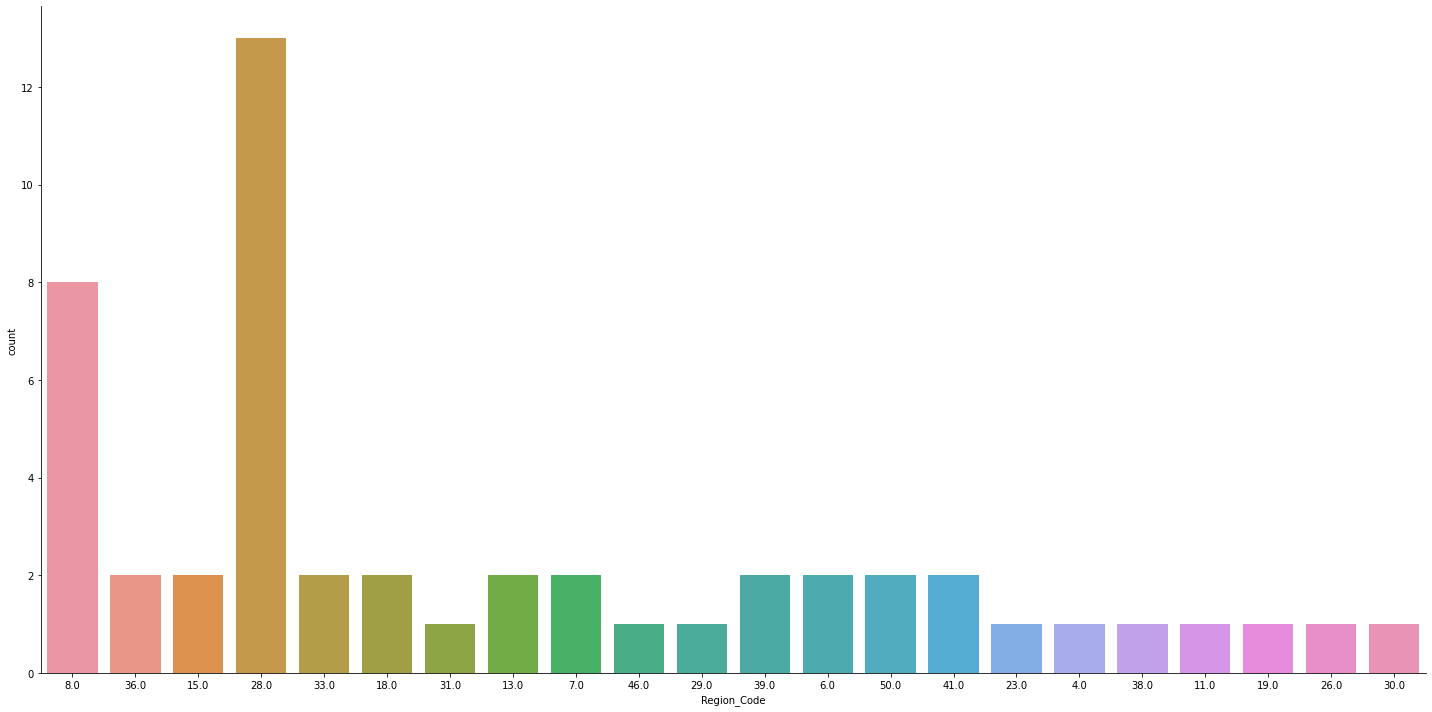

In [24]:
# cast Region_Code to Category using only the options that appear in the data frame
bad_train["Region_Code"] = bad_train["Region_Code"].astype(
    pd.CategoricalDtype(bad_train["Region_Code"].unique())
)

sns.catplot(
    data=bad_train, x="Region_Code", kind="count", height=10, aspect=2 / 1
)


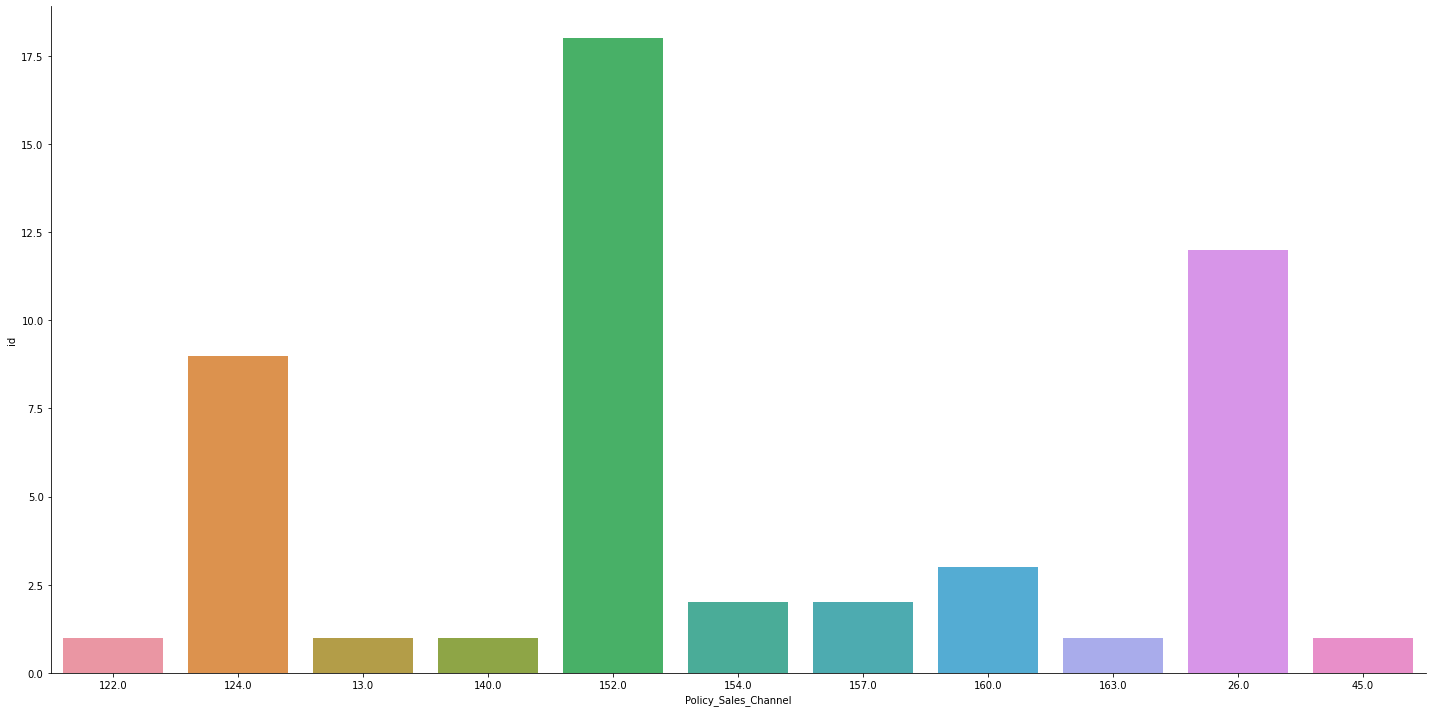

In [25]:
bad_train_grpd = bad_train.groupby("Policy_Sales_Channel").count()

bad_train_grpd = bad_train_grpd.loc[bad_train_grpd["id"] > 0]

# reset index to re-include groupby counts (this resets all dtypes)
bad_train_grpd = bad_train_grpd.reset_index()

# reset PSC to categorial dtype
bad_train_grpd["Policy_Sales_Channel"] = bad_train_grpd["Policy_Sales_Channel"].astype(
    pd.CategoricalDtype(bad_train_grpd["Policy_Sales_Channel"].unique())
)

sns.catplot(
    data=bad_train_grpd,
    x="Policy_Sales_Channel",
    y="id",
    height=10,
    aspect=2 / 1,
    kind="bar",
)


Es gibt zwar Hinweise darauf, dass manche Regionen und Sales Channel fehleranfälliger sind als andere, der Verdacht, dass die fehlerhaften Datensätze auf eine Datenquelle zurückzuführen sind, konnte nicht bestätigt werden.

## 2.7 Korrelation der Variablen <a class="anchor" id="section_2_7"></a>

In [26]:
# remove id from correlation matrix as it does not provide any usefull information
def correlation_matrix_table(data):
    correlation = data.corr()
    return correlation


In [27]:
correlation_matrix_table(train)


,id,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Response
id,1.000000,-0.000264,0.002489,0.002489,-0.001539,0.003225,-0.000618,-0.001293
Age,-0.000264,1.000000,-0.254485,-0.254485,0.265097,0.066933,-0.001123,0.109969
Driving_License,0.002489,-0.254485,1.000000,1.000000,-0.823370,0.003981,0.002446,-0.340751
Previously_Insured,0.002489,-0.254485,1.000000,1.000000,-0.823370,0.003981,0.002446,-0.340751
Vehicle_Damage,-0.001539,0.265097,-0.823370,-0.823370,1.000000,0.009428,-0.002034,0.354438
Annual_Premium,0.003225,0.066933,0.003981,0.003981,0.009428,1.000000,-0.000592,0.022631
Vintage,-0.000618,-0.001123,0.002446,0.002446,-0.002034,-0.000592,1.000000,-0.001031
Response,-0.001293,0.109969,-0.340751,-0.340751,0.354438,0.022631,-0.001031,1.000000


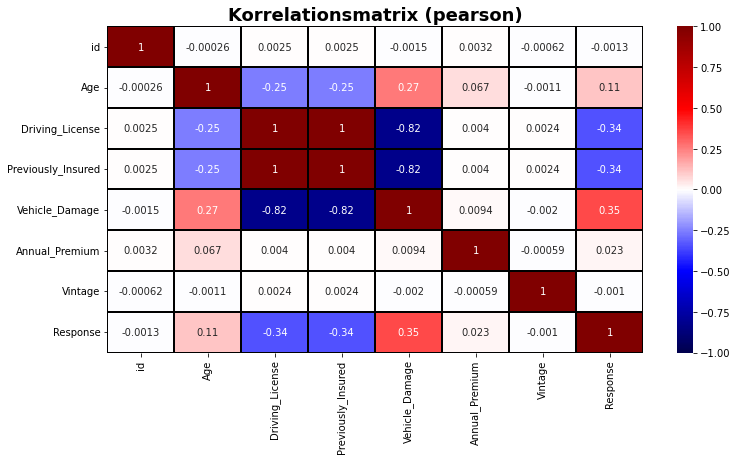

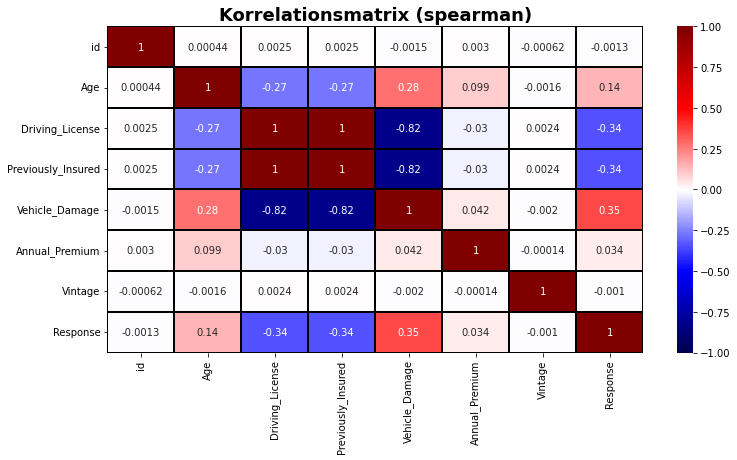

In [28]:
def correlation_matrix(data, x, y, show_labels, col_map, method="pearson"):
    corr = data.corr(method=method)
    plt.figure(figsize=(x, y))
    sns.heatmap(
        corr, annot=show_labels, linewidths=1, linecolor="black", cmap=col_map, vmin=-1, vmax=1
    )
    plt.title(f"Korrelationsmatrix ({method})", fontsize=18, weight="bold")


correlation_matrix(train, 12, 6, True, "seismic", "pearson")
correlation_matrix(train, 12, 6, True, "seismic", "spearman")


- Es fällt auf, dass `Previously_Insured` und `Driving_License` die höchste Korrelation, undzwar von 1, aufweisen. Das liegt daran, dass jeder KFZ-Besitzer eine KFZ-Versicherung haben muss sofern das KFZ angemeldet ist.
- Die geringste Korrelation weisen die Variablen (`Driving_License` und `Vintage`), sowie (`Previously_Insured` und `Vintage`) auf, mit einer Korrelation von 0,0024.
- Hohe negative Korrelation zwischen `Vehicle_Damage` und `Previously_Insured`
- Korrelation von 0,35 zwischen `Vehicle_Damage` und `Response`. Wenn ich in der Vergangenheit einen Schadensfall hatte, bin ich eher dazu geneigt eine Versicherung abzuschließen.
- Generell scheint `Vintage` keine nennenswerte Korrelation aufzuweisen

In [29]:
print(f'In wie vielen Fällen ist Driving_License != Previously_Insured?\n -> {len(train.loc[train["Driving_License"] != train["Previously_Insured"]])}')
# Observation was confirmed!
# Columns Driving_License and Previously_Insured are equals!


In wie vielen Fällen ist Driving_License != Previously_Insured?
 -> 0


Beobachtung:
- Die Spalte `Driving_License` und `Previously_Insured` haben exakt die gleichen Daten

## 2.8 Interpretation der Variablen <a class="anchor" id="section_2_8"></a>

### 2.8.1 Interpretation der Variable Gender <a class="anchor" id="section_2_8_1"></a>

Die Variable Gender beschreibt das Geschlecht der Versicherungsnehmer.

Text(0.5, 1.0, 'Female Responses')

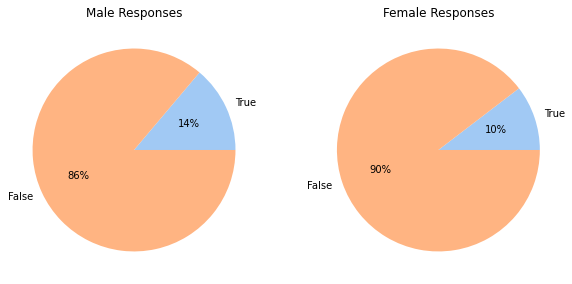

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
colors = sns.color_palette('pastel')[0:2]
l = ["True", "False"]

male = train.loc[train["Gender"] == "Male"]

# MALE PIE CHART
d_m = [len(male.loc[male["Response"] == True]),
       len(male.loc[male["Response"] == False])]
ax1.pie(d_m, labels=l, colors=colors, autopct='%.0f%%')
ax1.set_title("Male Responses")

# FEMALE PIE CHART
female = train.loc[train["Gender"] == "Female"]
d_f = [len(female.loc[female["Response"] == True]),
       len(female.loc[female["Response"] == False])]
ax2.pie(d_f, labels=l, colors=colors, autopct='%.0f%%')
ax2.set_title("Female Responses")

Beobachtungen:
- Keine signifikanten unterschiede im Interesse an KFZ-Versicherungen bei Männern und Frauen

### 2.8.2 Interpretation der Variable Age <a class="anchor" id="section_2_8_2"></a>

Die Variable Age beschreibt das Alter der Versicherungsnehmer.

Erwartungen:
- Plotten der Altersverteilung gibt Rückschlüsse zur Datenqualität bzw. zur Datenherkunft
    - Es ist eine pyramiedenförmige Altersverteilung zu erwarten, da der Datensatz aus Indien stammt
- Ältere und damit erfahrenere Kunden sind eher an einer Versicherung interessiert

Text(0.5, 1.0, 'Betrachtung aller Daten')

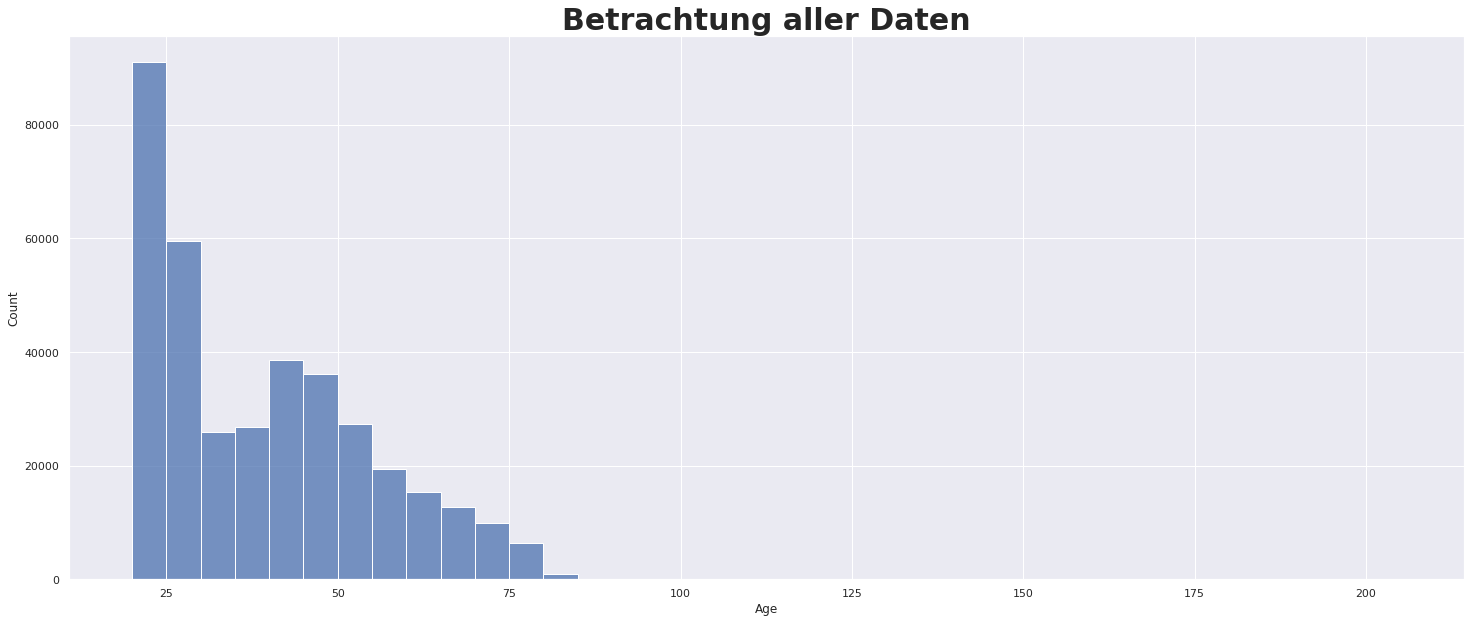

In [31]:
sns.set(rc={"figure.figsize": (25, 10)})
histplot_age = sns.histplot(train, x="Age", binwidth=5)
histplot_age.set_title("Betrachtung aller Daten", fontsize=30, weight='bold')


Beobachtungen:
- Es gibt unrealisitsch hohe Alterswerte
- Aus der Fallbeschreibung konnte entnommen werden, dass es sich um einen Datensatz aus Indien handelt. Es wurde von der Währung Rs (Indische Rupie) gesprochen. Die Altersverteilung kommt der pyramidenförmigen demografischen Verteilung von Indien deutlich näher als der Urnenform von Deutschland. Die geplottete Altersverteilung bestätigt zusätzlich die Datenherkunft und Datengüte, da die erwartete Verteilung, bis auf einen Sattelpunkt bei 30-40, ausgegeben wurde.
- Es gibt keine Werte unter 20

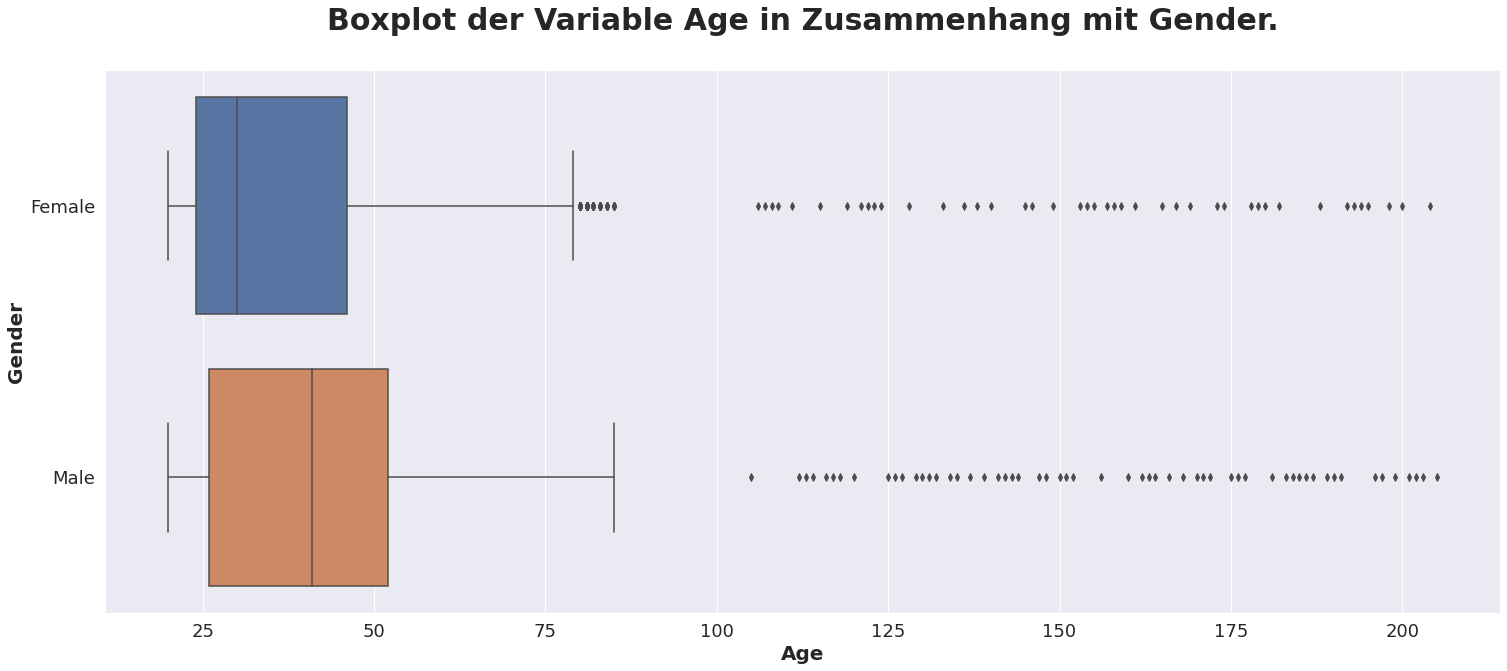

In [32]:
sns.set(rc={"figure.figsize": (25, 10)})
boxplot = sns.boxplot(data=train, y="Gender", x="Age", orient="horizontal")
boxplot.set_xlabel("Age", fontsize=20, weight='bold')
boxplot.set_ylabel("Gender", fontsize=20, weight='bold')
boxplot.set_title("Boxplot der Variable Age in Zusammenhang mit Gender." +
                  "\n", fontsize=30, weight='bold')
plt.tick_params(axis="both", labelsize=18)


In [33]:
print(f'Durchschnittsalter von Männern: {train.loc[train["Gender"] == "Male"].mean()["Age"]}')
print(f'Durchschnittsalter von Frauen: {train.loc[train["Gender"] == "Female"].mean()["Age"]}')

Durchschnittsalter von Männern: 40.93775208052548
Durchschnittsalter von Frauen: 36.39851815146474


Beobachtungen:
- Männer sind im Schnitt älter als Frauen

Alle Datensätze bei denen das Alter über 100 Jahren liegt, sind nicht realitätsnah und werden genauer betrachtet:

In [34]:
train.loc[(train.Age >= 100)]


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
2444,2445,Female,133,True,12.0,True,< 1 Year,False,29183.0,152.0,44,False
3734,3735,Male,171,False,28.0,False,1-2 Year,True,27966.0,163.0,48,True
4805,4806,Male,163,True,28.0,True,1-2 Year,False,2630.0,124.0,200,False
4858,4859,Male,144,True,26.0,True,< 1 Year,False,30869.0,152.0,288,False
5635,5636,Male,187,False,33.0,False,< 1 Year,True,35397.0,124.0,96,True
...,...,...,...,...,...,...,...,...,...,...,...,...
191789,191790,Male,117,False,28.0,False,> 2 Years,True,47282.0,26.0,62,True
191977,191978,Male,120,False,5.0,False,< 1 Year,True,27514.0,26.0,31,False
192630,192631,Female,108,True,11.0,True,< 1 Year,False,28031.0,152.0,22,False
195149,195150,Male,168,True,10.0,True,< 1 Year,False,2630.0,152.0,26,False


Die Daten mit unrealistisch hohen Alterswerten sind möglicherweise alte Datensätze, die nicht gepflegt bzw. im Fall der Vertragsauflösung nicht gelöscht wurden.

### 2.8.3 Interpretation der Variable Driving_License <a class="anchor" id="section_2_8_3"></a>


Die Variable `Driving_License` beschreibt ob ein Versicherungsnehmer einen Führerschein besitzt.

Erwartungen:
- Kunden, die keinen Führerschein besitzen, haben keine Verwendung für eine KFZ-Versicherung
    - Außer sie planen kurzfristig den Erwerb eines Führerscheins
- Führerscheinbesitzer haben möglicherweise schon eine KFZ-Versicherung

Text(0.5, 1.0, 'Not Driving License Owner')

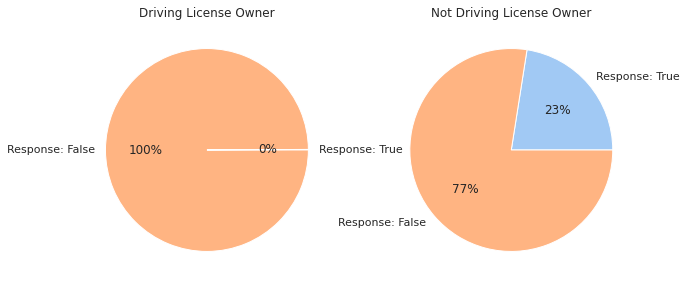

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
colors = sns.color_palette('pastel')[0:4]

dl_true = train.loc[train["Driving_License"] == True]
dl_false=train.loc[train["Driving_License"] == False]

# dl_true PIE CHART
d_true = [len(dl_true.loc[dl_true["Response"] == True]),
       len(dl_true.loc[dl_true["Response"] == False])]
l_true = ["Response: True", "Response: False"]
ax1.pie(d_true, labels=l_true, colors=colors, autopct='%.0f%%')
ax1.set_title("Driving License Owner")

# dl_false PIE CHART
d_false = [len(dl_false.loc[dl_false["Response"] == True]),
       len(dl_false.loc[dl_false["Response"] == False])]
l_false = l_true

ax2.pie(d_false, labels=l_false, colors=colors, autopct='%.0f%%')
ax2.set_title("Not Driving License Owner")


Beobachtungen:
- Nahezu kein Führerscheinbesitzer ist an einer KFZ-Versicherung interessiert. Möglicherweise weil Führerscheinbesitzer auch ein Auto und deswegen auch eine KFZ-Versicherung besitzen
- Fast 1/4 aller Führerscheinlosen haben Interesse an einer KFZ-Versicherung bekundet

### 2.8.4 Interpretation der Variable Region_Code <a class="anchor" id="section_2_8_4"></a>


Die Variable `Region_Code` beschreibt den Wohnort der Kunden. Es handelt sich um eine kategoriale Variable mit 53 Ausprägungen. Sie kann analog zur Postleitzahl verstanden werden.

Erwartungen:
- In einer guten Wohngegend können sich die Versicherungsnehmer eher eine KFZ-Versicherung leisten oder besitzen ein teureres Auto, für das sich eine Versicherung lohnt
- Analog dazu verzichten Kunden aus ärmeren Regionen aus finanziellen Gründen eher auf eine KFZ-Versicherung
- Bestimmte Verkaufskanäle konzentrieren sich auf bestimmte Regionen, andere agieren flächendeckend

In [36]:
len(train["Region_Code"].unique())

53

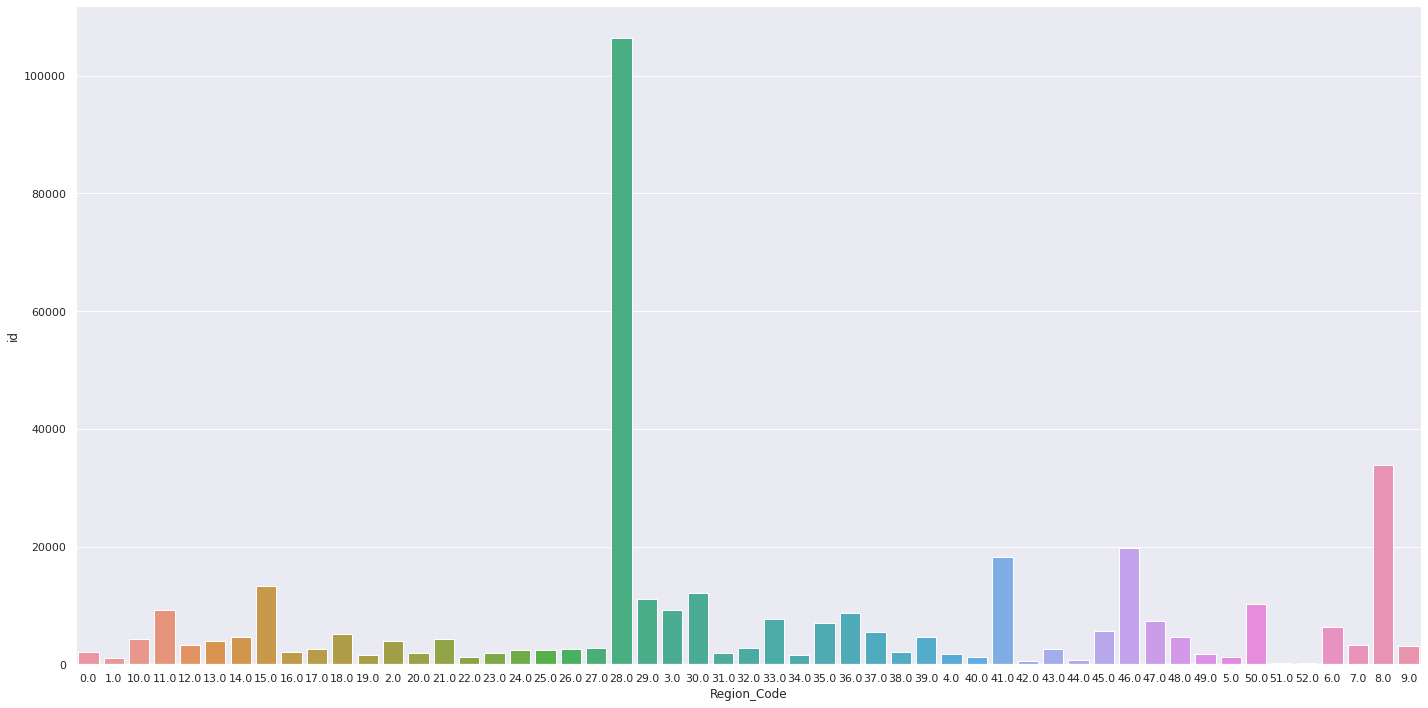

In [37]:
p_data = train.groupby("Region_Code").count()

p_data = p_data.loc[p_data["id"] > 0]

# reset index to re-include groupby counts (this resets all dtypes)
p_data = p_data.reset_index()

# reset PSC to categorial dtype
p_data["Region_Code"] = p_data["Region_Code"].astype(
    pd.CategoricalDtype(p_data["Region_Code"].unique())
)

plot = sns.catplot(
    data=p_data,
    x="Region_Code",
    y="id",
    height=10,
    aspect=2 / 1,
    kind="bar"
)


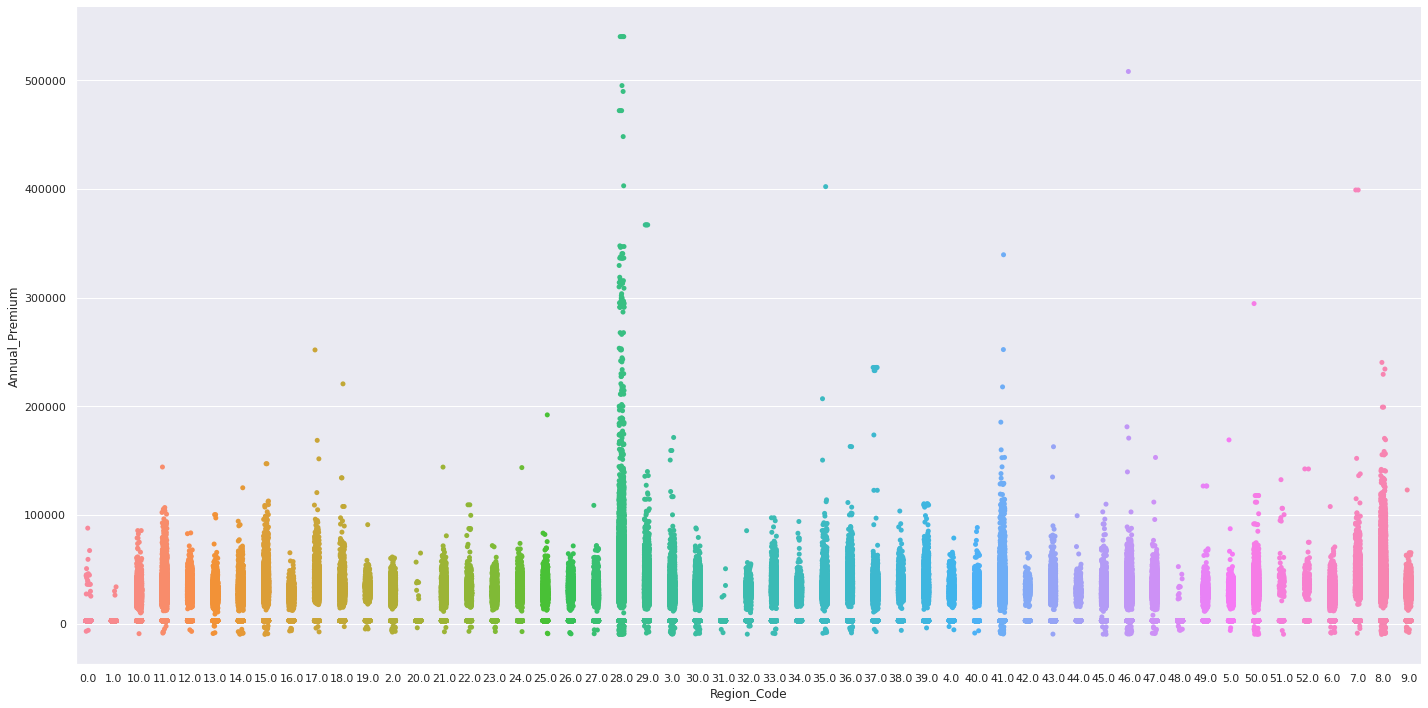

In [38]:

plot = sns.catplot(
    data=train,
    x="Region_Code",
    y="Annual_Premium",
    height=10,
    aspect=2 / 1,
)

### 2.8.5 Interpretation der Variable Previously_Insured <a class="anchor" id="section_2_8_5"></a>

Text(0.5, 1.0, 'Not previously insured')

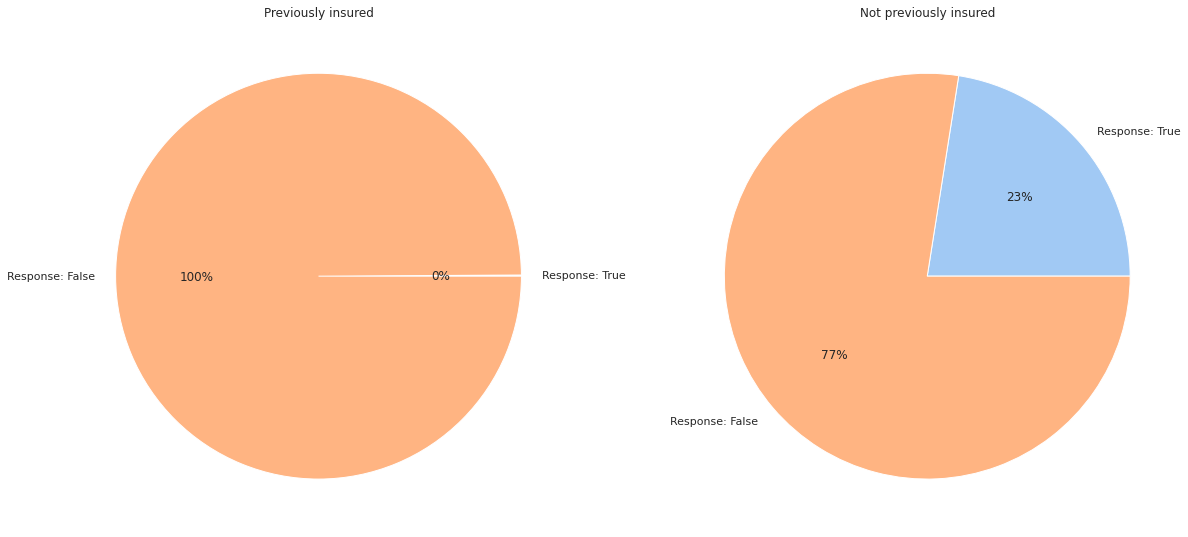

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
colors = sns.color_palette('pastel')[0:2]

d_1 = train.loc[train["Previously_Insured"] == True]
d_2 = train.loc[train["Previously_Insured"] == False]

l = ["Response: True", "Response: False"]

p_1 = [len(d_1.loc[d_1["Response"] == True]),
       len(d_1.loc[d_1["Response"] == False])]
ax1.pie(p_1, labels=l, colors=colors, autopct='%.0f%%')
ax1.set_title("Previously insured")

p_2 = [len(d_2.loc[d_2["Response"] == True]),
       len(d_2.loc[d_2["Response"] == False])]
ax2.pie(p_2, labels=l, colors=colors, autopct='%.0f%%')
ax2.set_title("Not previously insured")


### 2.8.6 Interpretation der Variable Vehicle_Age <a class="anchor" id="section_2_8_6"></a>

Die Variable `Vehicle_Age` beschreibt das Alter des Fahrzeugs. Es ist eine kategoriale Variable mit den drei Ausprägungen `< 1 Year`, `1-2 Year` und `> 2 Years`.

Erwartungen:
- Besitzer neuer KFZs wollen ihre Neuanschaffung eher versichern

Text(0.5, 1.0, 'Vehicle_Age > 2 Years')

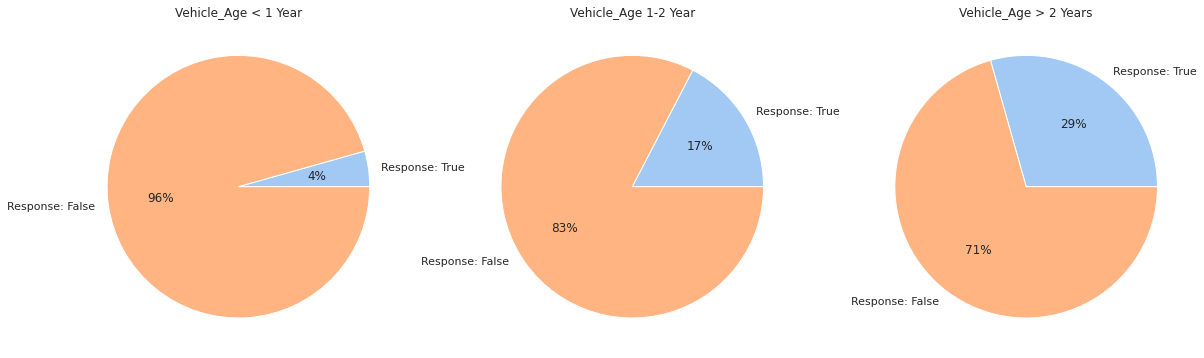

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
colors = sns.color_palette('pastel')[0:2]

dl_1 = train.loc[train["Vehicle_Age"] == "< 1 Year"]
dl_2 = train.loc[train["Vehicle_Age"] == "1-2 Year"]
dl_3 = train.loc[train["Vehicle_Age"] == "> 2 Years"]

l = ["Response: True", "Response: False"]
# dl_1 PIE CHART
d_1 = [len(dl_1.loc[dl_1["Response"] == True]),
       len(dl_1.loc[dl_1["Response"] == False])]
ax1.pie(d_1, labels=l, colors=colors, autopct='%.0f%%')
ax1.set_title("Vehicle_Age < 1 Year")

# dl_2 PIE CHART
d_2 = [len(dl_2.loc[dl_2["Response"] == True]),
       len(dl_2.loc[dl_2["Response"] == False])]
ax2.pie(d_2, labels=l, colors=colors, autopct='%.0f%%')
ax2.set_title("Vehicle_Age 1-2 Year")

# dl_3 PIE CHART
d_3 = [len(dl_3.loc[dl_3["Response"] == True]),
       len(dl_3.loc[dl_3["Response"] == False])]
ax3.pie(d_3, labels=l, colors=colors, autopct='%.0f%%')
ax3.set_title("Vehicle_Age > 2 Years")


Beobachtungen:
- Das Gegenteil der Erwarteten Verteilung ist der Fall: Je älter ein Auto ist, desto eher ist der Besitzer an einer Versicherung interessiert

### 2.8.7 Interpretation der Variable Vehicle_Damage <a class="anchor" id="section_2_8_7"></a>

Die Variable `Vehicle_Damage` beschreibt, ob es an einem Fahrzeug schonmal einen Schadensfall gab.

Erwartung:
- Jemand, der bereits einen Schaden hatte, hat aus der Erfahrung gelernt, dass es Vorteilhaft sein kann eine Versicherung zu haben

Text(0.5, 1.0, 'Vehicle_Damage: False')

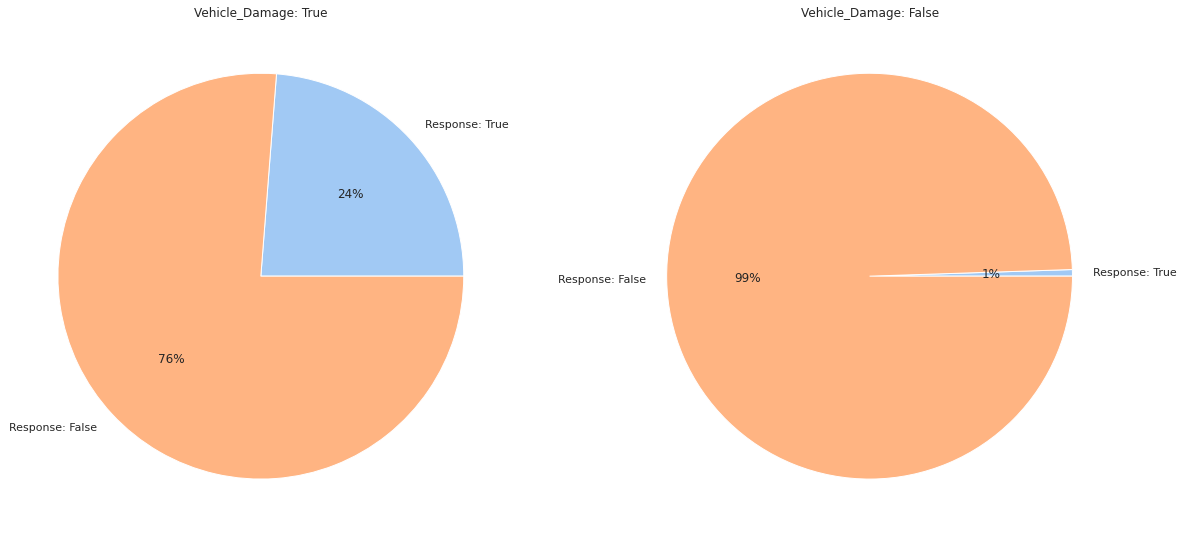

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
colors = sns.color_palette('pastel')[0:2]

dl_1 = train.loc[train["Vehicle_Damage"] ==True]
dl_2 = train.loc[train["Vehicle_Damage"] == False]

l = ["Response: True", "Response: False"]
# dl_1 PIE CHART
d_1 = [len(dl_1.loc[dl_1["Response"] == True]),
       len(dl_1.loc[dl_1["Response"] == False])]
ax1.pie(d_1, labels=l, colors=colors, autopct='%.0f%%')
ax1.set_title("Vehicle_Damage: True")

# dl_2 PIE CHART
d_2 = [len(dl_2.loc[dl_2["Response"] == True]),
       len(dl_2.loc[dl_2["Response"] == False])]
ax2.pie(d_2, labels=l, colors=colors, autopct='%.0f%%')
ax2.set_title("Vehicle_Damage: False")


Beobachtung:
- Genau wie erwartet, gibt es einen deutlichen Zusammenhang zwischen bereits erlittenem Schadensfall und dem Interesse an einer KFZ-Versicherung

### 2.8.8 Interpretation der Variable Annual_Premium <a class="anchor" id="section_2_8_8"></a>

Die Variable `Annual_Premium` beschreibt den jährlichen Versicherungsbeitrag (der Krankenversicherung) des Kunden.

Erwartungen:
- Ein Kunde, der mit seiner Krankenversicherung zufrieden ist, etwa weil der Beitrag niedrig ist, ist eher verleitet, bei der selben Versicherung ein weiteres Produkt zu kaufen
- Das `Annual_Premium` ist abhängig vom Alter des Versicherten.

In [42]:
train["Annual_Premium"].describe()


count    380999.000000
mean      30527.700690
std       17242.997675
min       -9997.000000
25%       24371.000000
50%       31656.000000
75%       39390.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [43]:
# len(train.loc[train["Annual_Premium"].isna()])
train["Annual_Premium"].isna().sum()


0

- Der durchschnittliche `Annual_Premium` liegt bei rund 30.500
- Das Minimun ist negativ, was auf (mindestens) einen fehlerhaften Wert hindeutet
- Es gibt 100 missing Values
- Das Maximum liegt gbei ca. 540.000 (dem 17 fachen des Durchschnitts). Entweder handelt es sich um ein teures Luxusauto, oder um einen Fehler

Text(0.5, 1.0, 'Übersicht über alle Werte')

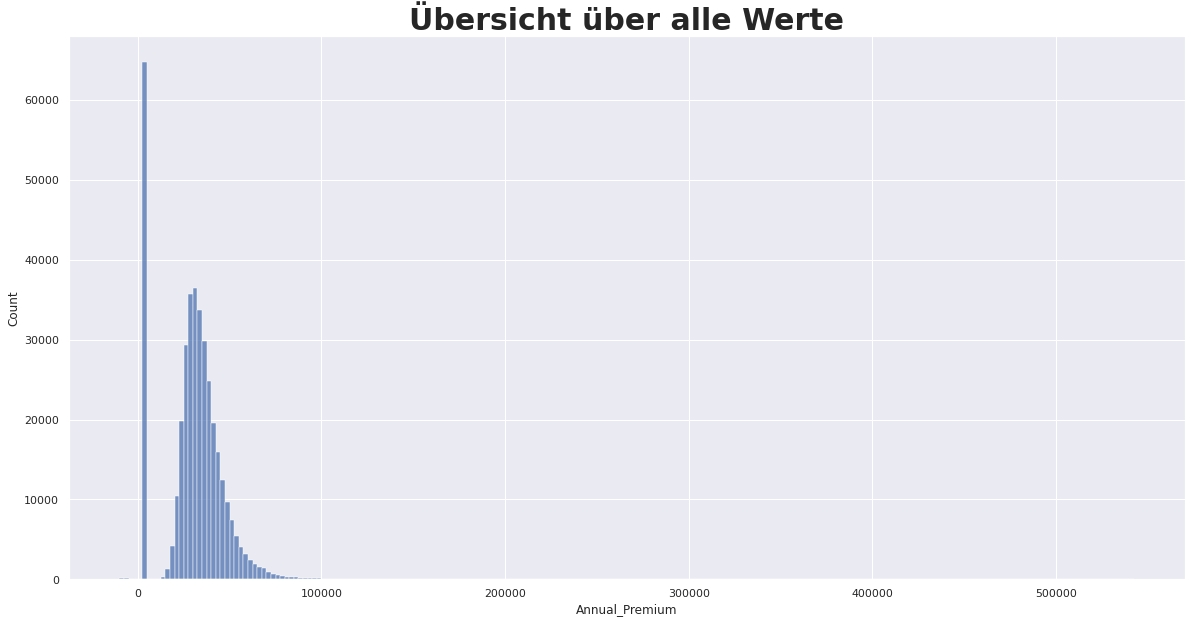

In [44]:
sns.set(rc={"figure.figsize": (20, 10)})

histplot_annual_premium = sns.histplot(
    train, x="Annual_Premium", binwidth=2500)
histplot_annual_premium.set_title(
    "Übersicht über alle Werte", fontsize=30, weight='bold')


Beobachtungen:
- Es gibt zwei Arten von Ausreißern. es gibt eine deutliche Konzentration (~65.000) bei einem Wert, außerhalb der eigentlichen Verteilung
- Es gibt wenige besonders hohe Werte (>100.000)
- Die Skala für `Annual_Premium` beginnt nicht bei 0, also gibt es invalide negative Werte

In [45]:
# count values < 3.000
print(
    f"Anzahl konzentrierter Werte bei rund 2.500: {len(train.loc[(train['Annual_Premium'] > 0) & (train['Annual_Premium'] < 3000)])}")

# count values > 100.000 -> 773
print(
    f"Anzahl besonders hoher Werte für Annual_Premium: {len(train.loc[train['Annual_Premium'] > 100000])}")


Anzahl konzentrierter Werte bei rund 2.500: 64805
Anzahl besonders hoher Werte für Annual_Premium: 775


Theorie: Das `Annual_Premium` ist abhängig vom Alter des Versicherten.

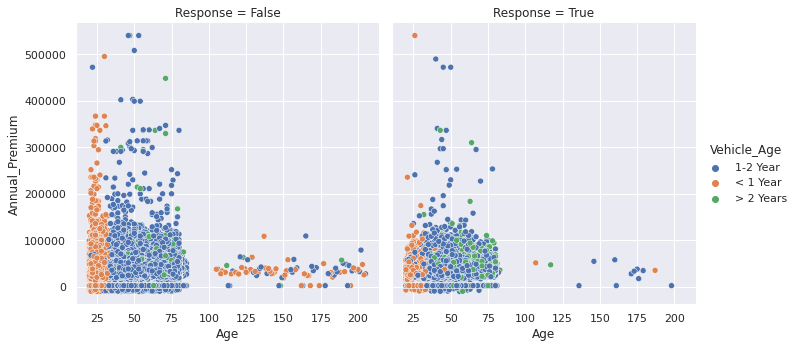

In [46]:
sns.set(rc={"figure.figsize": (20, 10)})
x = sns.relplot(data=train, x="Age", y="Annual_Premium",
                col="Response", hue="Vehicle_Age")


Beobachtung:
- Die Theorie, dass ältere Versicherungsnehmer höhere Beiträge zahlen scheint nicht zu stimmen. Es hätte ein Abwärtstrend zu sehen sein müssen.
- Vor allem in der Gruppe der unter einem Jahr alten Autos kann man sehen, dass die Besitzer fast ausschließlich Versicherungen abgeschlossen haben, wenn sie bereits einen günstigen KV-Tarif hatten.

Text(0.5, 1.0, 'Betrachtung des validen/realistischen Datenbereichs')

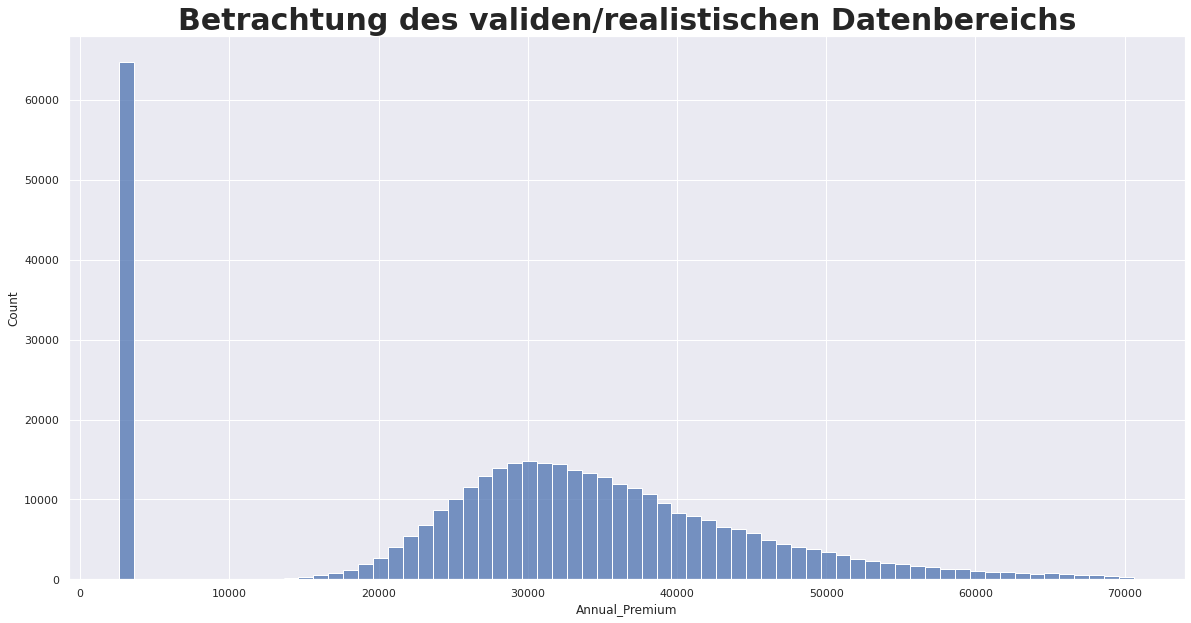

In [47]:
sns.set(rc={"figure.figsize": (20, 10)})

plot_data = train.loc[(train["Annual_Premium"] > 0) &
                      (train["Annual_Premium"] < 70000)]

histplot_annual_premium = sns.histplot(
    plot_data, x="Annual_Premium", binwidth=1000)
histplot_annual_premium.set_title(
    "Betrachtung des validen/realistischen Datenbereichs", fontsize=30, weight='bold')


Beobachtungen:
- rechtsschiefe Verteilung um 30.000
- Ausreißer bei rund 2.000. Das ist möglicherweise ein besonderer Versicherungstarif, z.B. ein pauschaler Tarif.

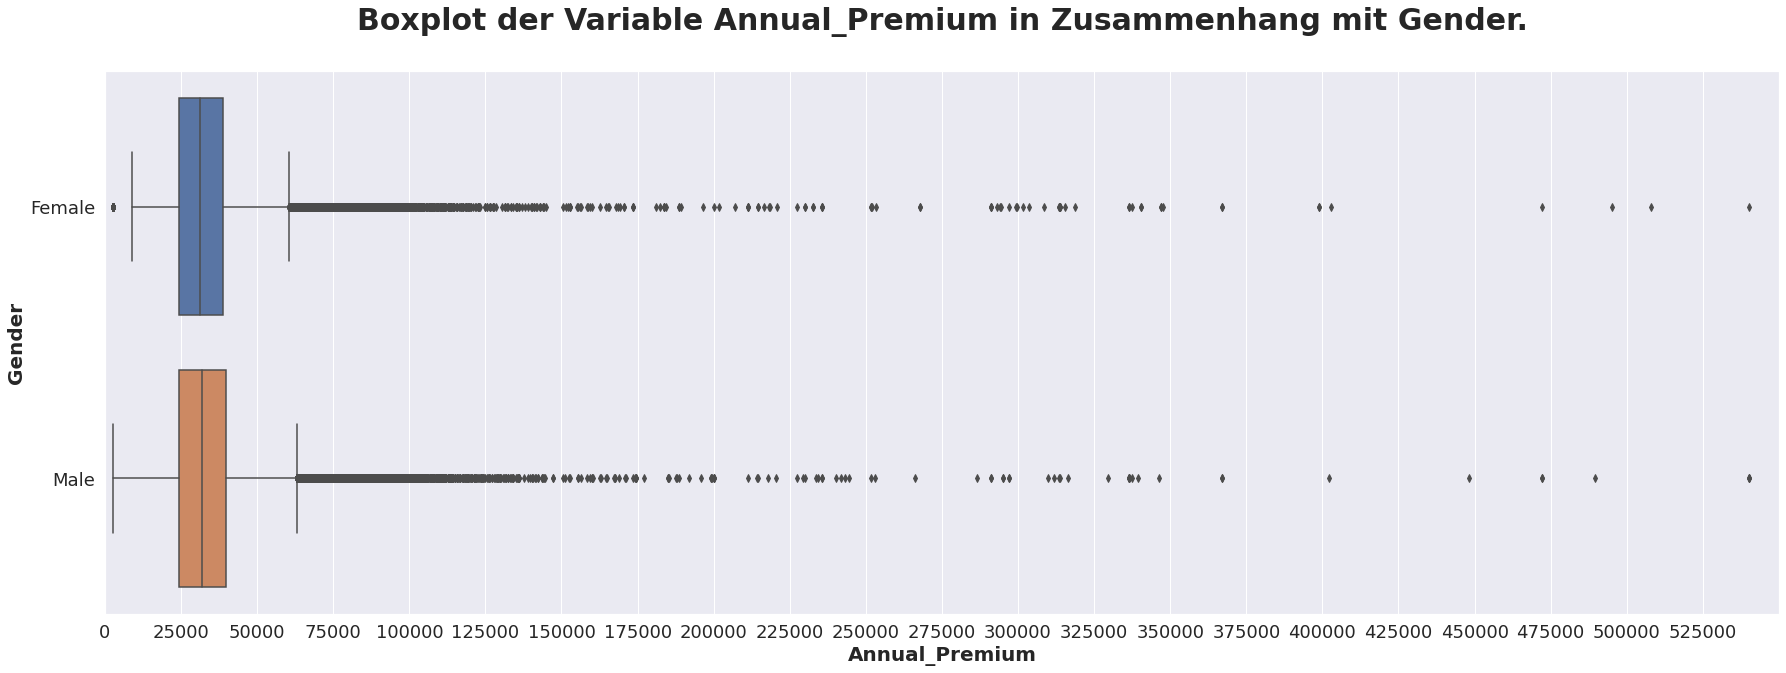

In [48]:
sns.set(rc={"figure.figsize": (30, 10)})
boxplot = sns.boxplot(data=train, y="Gender",
                      x="Annual_Premium", orient="horizontal")
boxplot.set_xlabel("Annual_Premium", fontsize=20, weight='bold')
boxplot.set_ylabel("Gender", fontsize=20, weight='bold')

boxplot.set_xlim(0, 550000)
boxplot.set_xticks(range(0, 550000, 25000))

boxplot.set_title("Boxplot der Variable Annual_Premium in Zusammenhang mit Gender." +
                  "\n", fontsize=30, weight='bold')
plt.tick_params(axis="both", labelsize=18)


### 2.8.9 Interpretation der Variable Policy_Sales_Channel <a class="anchor" id="section_2_8_9"></a>

Die Variable `Policy_Sales_Channel` beschreibt den Verkaufskanal, über den die bestehende Krankenversicherung abgeschlossen wurde.

Erwartungen:
- Bei bestimmten Verkaufskanälen gibt es ein höheres Interesse an KFZ-Versicherungen


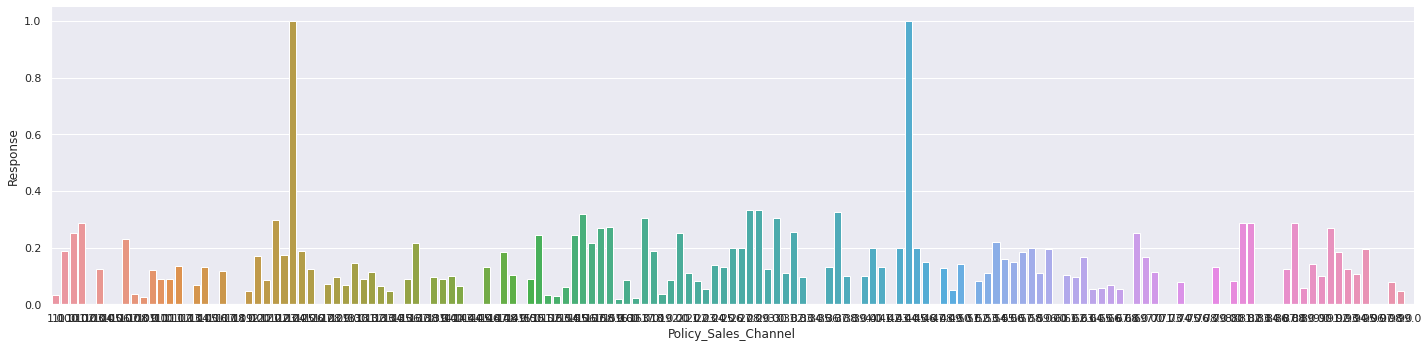

In [49]:
p = sns.catplot(x="Policy_Sales_Channel",y="Response", data=train, ci=None, aspect=4, kind="bar")

Beobachtungen:
- Es gibt deutliche Unterschiede zwischen den Vertriebskanälen
    - Allerdings haben Vertriebskanäle mit wenigen Kunden extremere Werte, da die Stichprobengröße kleiner ist

Es müssen weitere Untersuchungen von prozentualer positiver Rückmeldung und Anzahl der Kunden für jeden Vertriebskanal vorgenommen werden.

Nachfolgend werden die Daten pro Vertriebskanal zusammengefasst, um deren Positivrückmeldungsrate im Vergleich zur Anzahl der betreuten Kunden einordnen zu können.

Text(0.5, 1.0, 'Erfolgsquote und Anzahl der Kunden pro Vertriebskanal (1 Punkt je Kanal)')

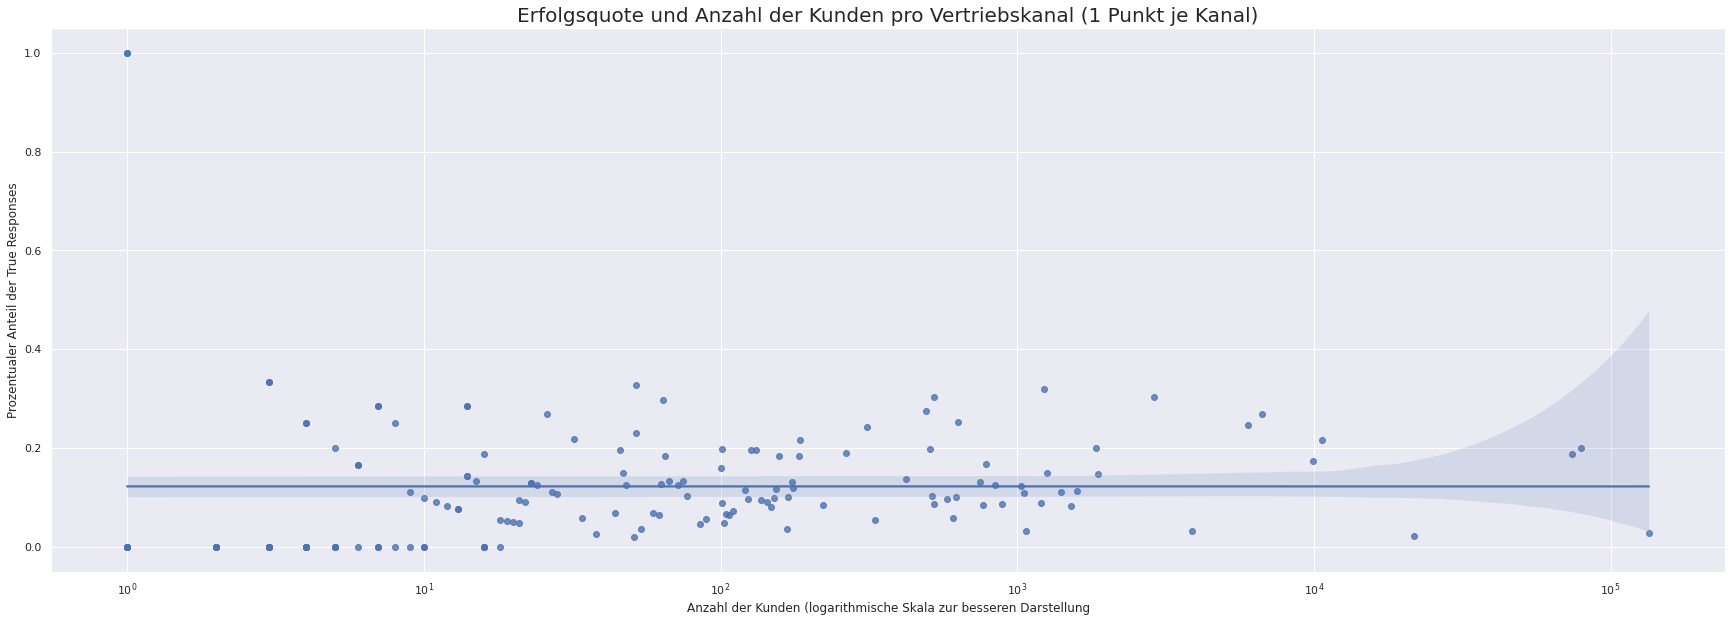

In [50]:
# get percentage of True response
percent =  train.groupby("Policy_Sales_Channel").sum() / train.groupby("Policy_Sales_Channel").count()
percent = percent.reset_index()
percent["Policy_Sales_Channel"] = percent["Policy_Sales_Channel"].astype(pd.CategoricalDtype(percent["Policy_Sales_Channel"].unique()))

# get count of all response
count = train.groupby("Policy_Sales_Channel").count()
count = count.reset_index()
count["Policy_Sales_Channel"] = count["Policy_Sales_Channel"].astype(pd.CategoricalDtype(count["Policy_Sales_Channel"].unique()))

# join results
combined = pd.merge(percent, count, how="inner", on=["Policy_Sales_Channel","Policy_Sales_Channel"], suffixes=["_percent", "_count"])
combined = combined.sort_values("Response_percent", ascending=False)

# trim useless columns
combined = combined[["Policy_Sales_Channel", "Response_percent", "Response_count"]]

no_positive_responses = combined.loc[combined["Response_percent"] == 0]
combined
# remove sales channels with no customers
combined = combined.loc[combined["Response_count"] > 0]
combined
p = sns.regplot(x="Response_count", y="Response_percent" ,data=combined)
p.set_xscale("log")
p.set_xlabel("Anzahl der Kunden (logarithmische Skala zur besseren Darstellung")
p.set_ylabel("Prozentualer Anteil der True Responses")
p.set_title("Erfolgsquote und Anzahl der Kunden pro Vertriebskanal (1 Punkt je Kanal)", size=20)


In [51]:
combined


,Policy_Sales_Channel,Response_percent,Response_count
97,43.0,1.000000,1
27,123.0,1.000000,1
80,28.0,0.333333,3
79,27.0,0.333333,3
89,36.0,0.326923,52
...,...,...,...
131,76.0,0.000000,4
133,79.0,0.000000,6
53,149.0,0.000000,1
104,50.0,0.000000,2


In [52]:
print(f"Anzahl der Vertriebskanäle ohne positive Response: {len(no_positive_responses)}")


Anzahl der Vertriebskanäle ohne positive Response: 34


Beobachtungen:
- Die Vertriebskanäle sind unabhängig von ihrer Größe mehr oder weniger erfolgreich
- Es gibt große Abweichungen vom Mittelwert unabhängig von der Anzahl der Kunden
- Wie erwartet haben die Vertriebskanäle mit 100% Positivrückmeldungsquote nur einen einzigen Kunden
    - Dennoch gibt es auch Vertriebskanäle mit über 1000 Kunden und rund 33% Positivquote
- Die meisten Vertriebskanäle haben weniger als 1000 Kunden
- Es gibt 34 Vertriebskanäle ohne positive Rückmeldung

### 2.8.10 Interpretation der Variable Vintage <a class="anchor" id="section_2_8_10"></a>

Die Variable `Vintage` beschreibt die Dauer des Versicherungsverhältnisses im letzten Jahr.

Erwartung:
- Besondere Salesevents oder Aktionen mit limitierter Laufzeit können als Peak erkannt werden

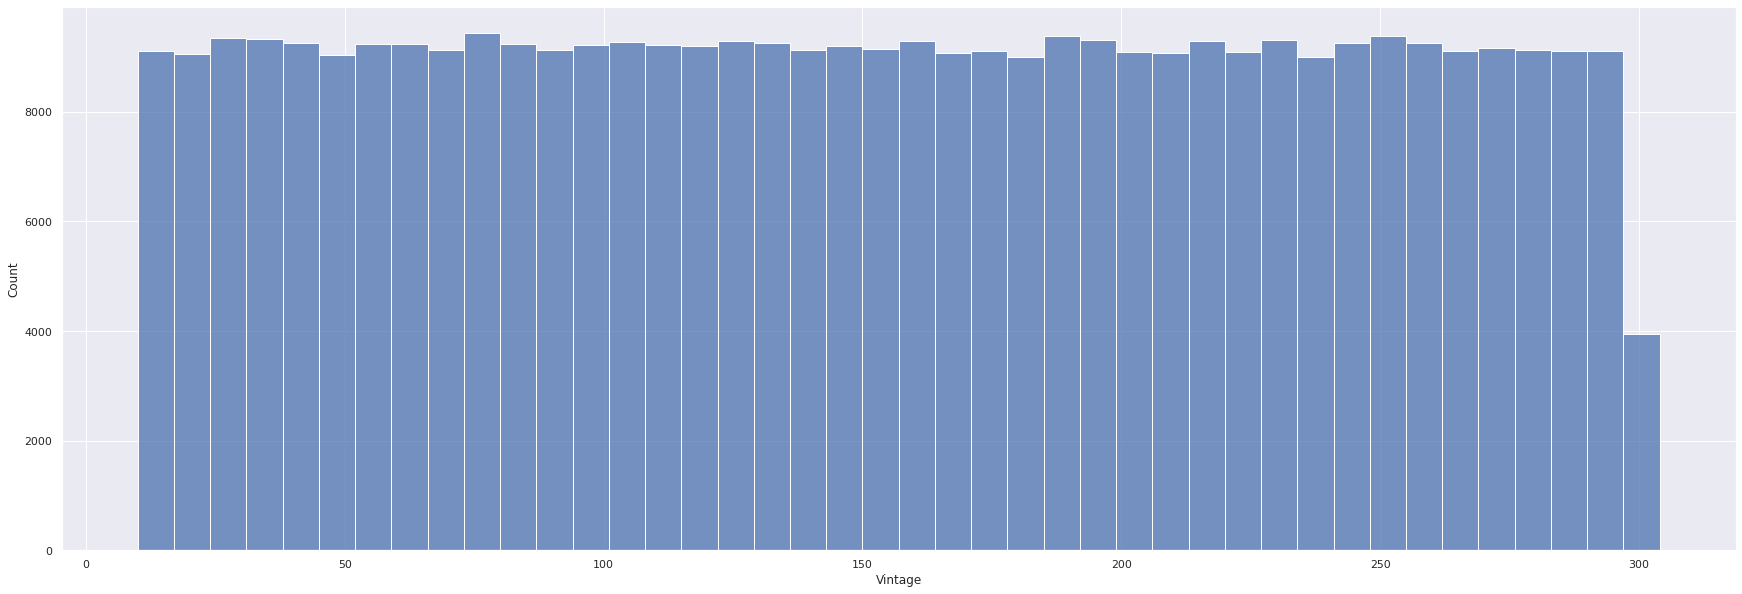

In [53]:
plot = sns.histplot(
    data=train,
    x="Vintage",
    binwidth=7 # 7 days = 1 week
)

<AxesSubplot:xlabel='Vintage', ylabel='Annual_Premium'>

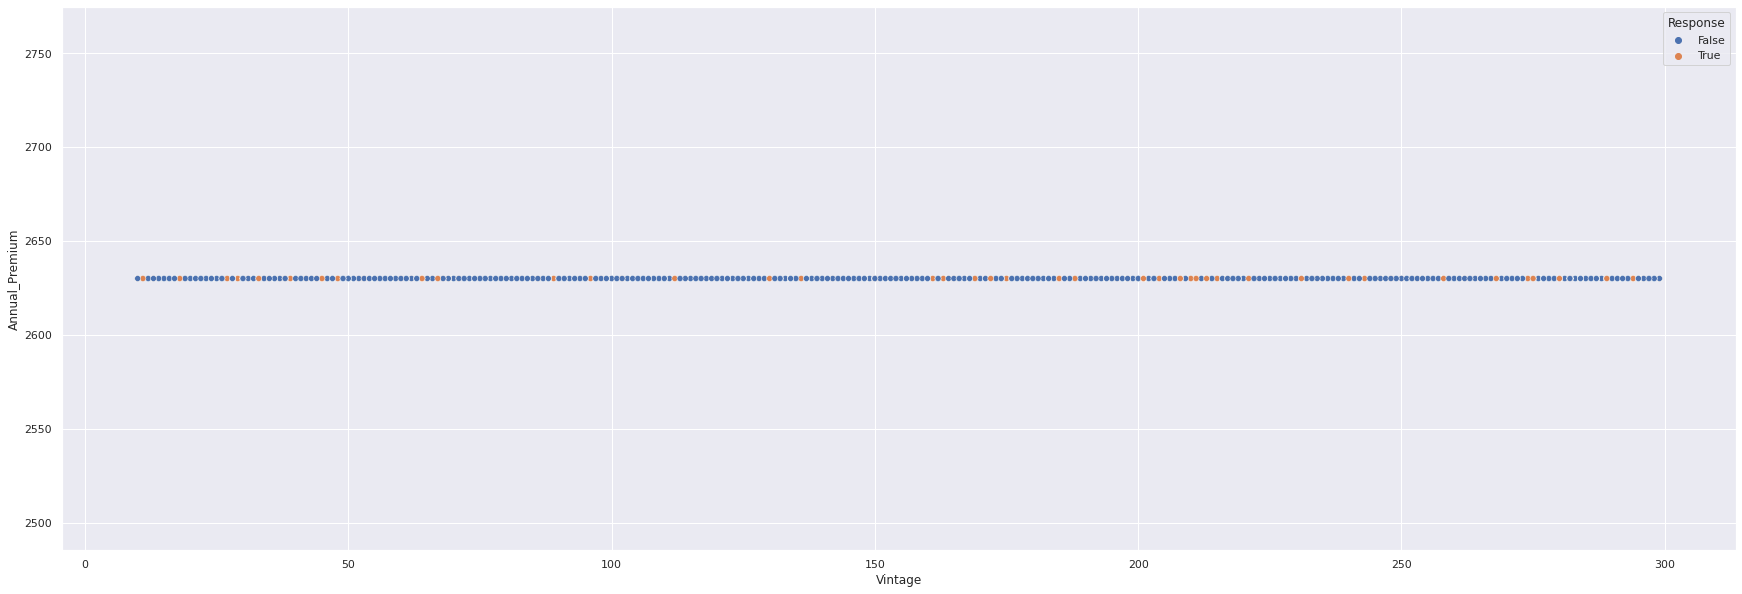

In [54]:

# Look at cheap contracts
d = train.loc[(train["Annual_Premium"] < 5000) & (train["Annual_Premium"] > 0)]
# d = d.loc[d["Response"] == True]
sns.scatterplot(data=d, x="Vintage", y="Annual_Premium", hue="Response")

Beobachtungen:
- Beinahe Gleichverteilung von `Vintage`
    - Es scheinen keine Verkaufsaktionen stattgefunden zu haben, oder sie sind ohne Erfolg geblieben
- Es gibt keine besonderen Zeiträume, in denen der günstige Pauschaltarif abgeschlossen wird
- Es gibt keine besonderen Zeiträume, in denen die  `Response` besonders gut ist

### 2.8.11 Interpretation der Variable Response <a class="anchor" id="section_2_8_11"></a>

Die Variable `Response` beschreibt das Interesse der Kunden an einer KFZ-Versicherung. Es ist die Zielvariable, die mithilfe eines Modells vorhergesagt werdern soll.

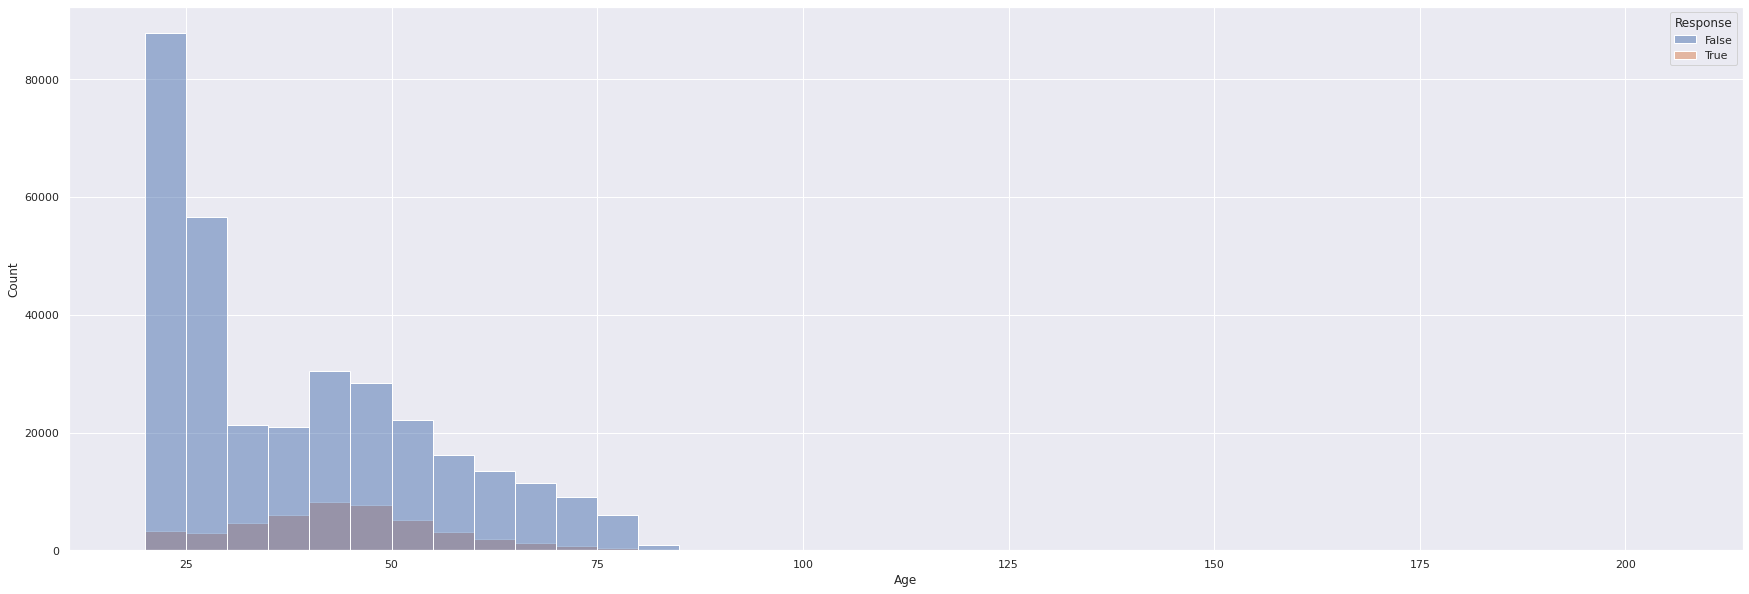

In [55]:
plot = sns.histplot(
    data=train,
    x="Age",
    binwidth=5,
    hue="Response"
)

Beobachtung:
- Kunden im mittleren Alter (zwischen 30 und 60) haben ein vergleichsweise höheres Interesse an einer Versicherung
- Ältere und jüngere Kunden haben ein überproportional geringes Interesse

Text(0.5, 1.0, 'Age >= 60')

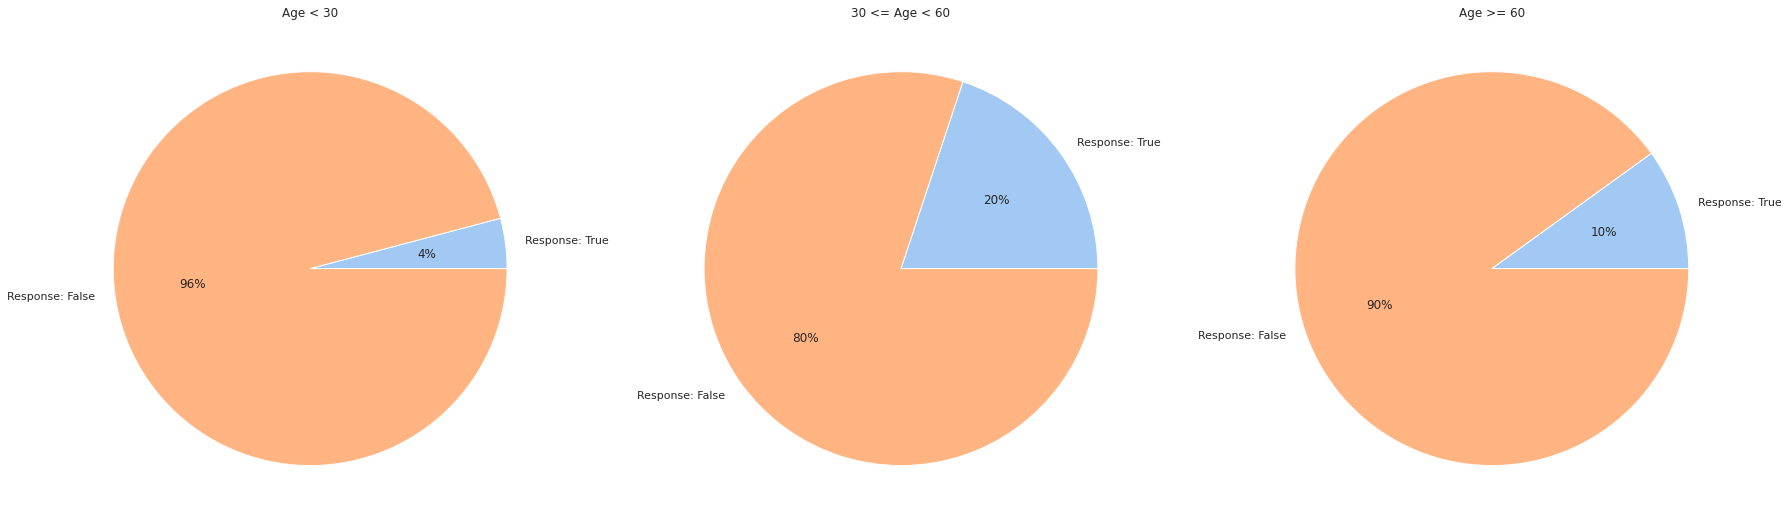

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
colors = sns.color_palette('pastel')[0:2]

d_1 = train.loc[train["Age"] < 30]
d_2 = train.loc[(train["Age"] >= 30) & (train["Age"] < 60)]
d_3 = train.loc[(train["Age"] >= 60) & (train["Age"] < 100)] # remove false data

l = ["Response: True", "Response: False"]

p_1 = [len(d_1.loc[d_1["Response"] == True]),
       len(d_1.loc[d_1["Response"] == False])]
ax1.pie(p_1, labels=l, colors=colors, autopct='%.0f%%')
ax1.set_title("Age < 30")

p_2 = [len(d_2.loc[d_2["Response"] == True]),
       len(d_2.loc[d_2["Response"] == False])]
ax2.pie(p_2, labels=l, colors=colors, autopct='%.0f%%')
ax2.set_title("30 <= Age < 60")

p_3 = [len(d_3.loc[d_3["Response"] == True]),
       len(d_3.loc[d_3["Response"] == False])]
ax3.pie(p_3, labels=l, colors=colors, autopct='%.0f%%')
ax3.set_title("Age >= 60")

Beobachtung:
- Besonders in der Altersgruppe 30-60 ist ein besonders großes Interesse an einer KFZ-Versicherung zu erkennen

# 3. Data Preparation <a class="anchor" id="chapter3"></a>

Die Erkenntnisse, die im Kapitel **Data Understanding** gewonnen wurden, werden nachfolgend angewandt, um invalide Daten zu entfernen und die Datenqualität zu erhöhen

## 3.1 Ausreißer behandeln <a class="anchor" id="section_3_1"></a>

### 3.1.1 Ausreißer innerhalb der Variable Age <a class="anchor" id="section_3_1_1"></a>

- Ab dem Alter >=100 Jahre werden alle Werte in Missing Values umgewandelt, da dieses Alter nicht realistisch ist.
- Diese Grenze wurde als großzügige Einschätzung den zu erwartenden Lebensalters festgelegt.
- Von dieser Änderung sind 100 Datensätze betroffen.

In [57]:
# len(train.loc[train["Age"]> 100])
train.loc[train["Age"] > 100, "Age"] = np.NaN
train.loc[train["Age"] < 18, "Age"] = np.NaN


### 3.1.2 Ausreißer innerhalb der Variable Annual_Premium <a class="anchor" id="section_3_1_2"></a>

In [58]:
train["Annual_Premium"].describe()


count    380999.000000
mean      30527.700690
std       17242.997675
min       -9997.000000
25%       24371.000000
50%       31656.000000
75%       39390.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

Negative Werte für `Annual_Premium` sind nicht valide. Es würde bedeuten, dass die Versicherungsgesellschaft den Kunden bezahlt.

In [59]:
# remove negative values
train.loc[train["Annual_Premium"] < 0, "Annual_Premium"] = np.NaN


## 3.2 Analyse der nicht vorhandenen Werte <a class="anchor" id="section_3_2"></a>

### 3.2.1 Löschen der 51 fehlerhaften Datensätze <a class="anchor" id="section_3_2_1"></a>

Wie im Abschnitt Data Unterstanding beschrieben wurden 51 Datensätze mit vielen fehlenden Werten gefunden. Da diese keinen signifikanten Einfluss auf das Modell haben werden, werden sie entfernt.

In [60]:
# remove faulty data sets
# bad_train was generated before and contains 51 data sets that we want to remove
train = train.loc[~train["id"].isin(bad_train["id"].to_numpy())]  # ~ = not
train.isna().sum()


id                          0
Gender                   1000
Age                     10941
Driving_License             0
Region_Code                 0
Previously_Insured          0
Vehicle_Age                 0
Vehicle_Damage              0
Annual_Premium            367
Policy_Sales_Channel        0
Vintage                     0
Response                    0
dtype: int64

## 3.3 Train/Test-Split <a class="anchor" id="section_3_3"></a>

TODO:
Für den Split unterteilen wir die Daten aus der Train.csv in Test und Train-Daten. Hier wird ein 70/30-Split genutzt

In [61]:
#Features
X = train.copy(deep=True)
X.drop("Response", axis="columns", inplace=True)
X.drop("id", axis="columns", inplace=True)
#labels
y = train['Response'].copy(deep=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# help IDE understand that we are still dealing with data frames
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

## 3.4 Imputation der fehlenden Werte <a class="anchor" id="section_3_4"></a>


Imputationsstrategie:
Die Imputation erfolgt anhand der nachfolgenden Prozedur. Es werden verschiedene Imputationsstrategien (`mean`, `median`, `hot_code_locf` und `most_frequent`) ausprobiert.

In [62]:
# strategies: mean, median, hot_code_locf, most_frequent, KNN
def impute_data(data: pd.DataFrame, col_name, strategy, y_data=None):
    if(strategy == "hot_code_locf"):
        return data[col_name].fillna(method="ffill")

    elif(strategy == "KNN"):
        # prepare data
        ref_data = pd.concat([data, pd.get_dummies(
            data["Gender"], prefix="Gender_is_")], axis=1)
        ref_data = pd.concat([data, pd.get_dummies(
            data["Vehicle_Age"], prefix="Vehicle_Age_is_")], axis=1)
        ref_data = data.loc[:, ~data.columns.duplicated()]

        # KNN imputation
        imputer = KNNImputer(missing_values=np.nan, n_neighbors=2)
        col_data = imputer.fit_transform(
            ref_data.select_dtypes(["number", "boolean"]), y_data)

        # restore column names
        col_data = pd.DataFrame(col_data, columns=ref_data.columns)

        return col_data[col_name]

    else:
        imputer = SimpleImputer(strategy=strategy, missing_values=np.NaN)
        fit = imputer.fit(data[[col_name]])
        col_data = fit.transform(data[[col_name]])
        return col_data


### 3.4.1 Ersetzung der fehlenden Werte numerischer Variablen <a class="anchor" id="section_3_4_1"></a>

#### 3.4.1.1 Imputation der Variable Age <a class="anchor" id="section_3_4_1_1"></a>

In [63]:
# X_train["Age"] = impute_data(X_train, "Age", "KNN", y_data=y_train)
# X_test["Age"] = impute_data(X_test, "Age", "KNN", y_data=y_test)

X_train["Age"] = impute_data(X_train, "Age", "mean")
X_test["Age"] = impute_data(X_test, "Age", "mean")


#### 3.4.1.2 Imputation der Variable Annual_Premium <a class="anchor" id="section_3_4_1_2"></a>

In [64]:
X_train["Annual_Premium"] = impute_data(X_train, "Annual_Premium", "median")
X_test["Annual_Premium"] = impute_data(X_test, "Annual_Premium", "median")

### 3.4.2 Ersetzung der fehlenden Werte kategorialer Variablen <a class="anchor" id="section_3_4_2"></a>

#### 3.4.2.1 Imputation der Variable Gender <a class="anchor" id="section_3_4_2_1"></a>

In [65]:
X_train["Gender"] = impute_data(X_train, "Gender", "most_frequent")
X_test["Gender"] = impute_data(X_test, "Gender", "most_frequent")

# cast to category again
X_train["Gender"] = X_train["Gender"].astype(pd.CategoricalDtype())
X_test["Gender"] = X_test["Gender"].astype(pd.CategoricalDtype())


### 3.4.3 Überprüfung der Imputationen<a class="anchor" id="section_3_4_3"></a>

In [66]:
print(f'Missing Values im bei Age: Test-> {X_test["Age"].isna().sum()}, Training-> {X_train["Age"].isna().sum()}')
print(f'Missing Values im bei Annual_Premium: Test-> {X_test["Annual_Premium"].isna().sum()}, Training-> {X_train["Annual_Premium"].isna().sum()}')
print(f'Missing Values im bei Gender: Test-> {X_test["Gender"].isna().sum()}, Training-> {X_train["Gender"].isna().sum()}')

Missing Values im bei Age: Test-> 0, Training-> 0
Missing Values im bei Annual_Premium: Test-> 0, Training-> 0
Missing Values im bei Gender: Test-> 0, Training-> 0


## 3.5. Sampling <a class="anchor" id="section_3_4"></a>


- Betrachtung der Zielvariable `Response`.
- Insgesamter Datensatz der Zielvariable beträgt: 380948 Datensätze
- Davon True: 46695 Datensätze, das macht 12% des Datensatzes aus. Dies ist die minority Class
- Davon False: 334253 Datensätze, das macht 88% des Datessatzes aus. Dies ist die majority Class

Mit den Methoden Oversampling und Undersampling wird versucht, ein Gleichgewicht zwischen der minority und majority Class herzustellen.
Zunächst muss die Zielvariable wieder zum Test- und Trainingsdatensatz hinzugefügt werden.

In [67]:
# re-add Response
X_train.insert(len(X_train.columns), value=y_train, column="Response")
X_test.insert(len(X_test.columns), value=y_test, column="Response")


In [68]:
# functions for visualization
# plot output
def plot_prop_of_split(train, test, col_name):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    cp_1 = sns.countplot(data=train, x=col_name, ax=ax[0])
    cp_1.set_title("Trainingsdaten")
    cp_2 = sns.countplot(data=test, x=col_name, ax=ax[1])
    cp_2.set_title("Testdaten")

    fig.suptitle(
        f"Verteilung der Variable {col_name} in Test- und Trainingsdaten")
    fig.show()

# console output


def print_class_len_and_ratio(data: pd.DataFrame, col_name):

    # minority_class
    minority_class_len = len(data[data[col_name] == True])
    print(
        f"Die Variable {col_name} enthält {minority_class_len} Datensätze die den Wert True enthalten.")

    # majority_class
    majority_class_len = len(data[data[col_name] == False])
    print(
        f"Die Variable {col_name} enthält {majority_class_len} Datensätze die den Wert False enthalten.")

    # ratio
    print(train["Response"].value_counts(normalize=True))


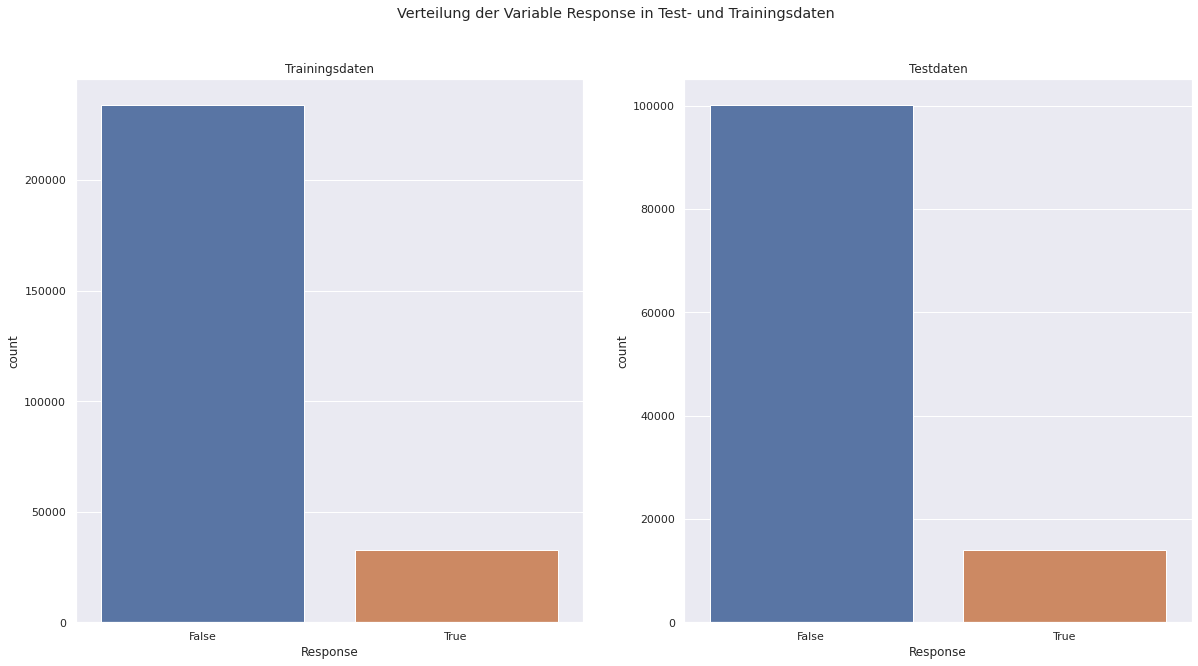

In [69]:

plot_prop_of_split(X_train, X_test, "Response")
# print_class_len_and_ratio(X_train, "Response")


### 3.5.1. Undersampling <a class="anchor" id="section_3_4_1"></a>

In [70]:
def undersample(data: pd.DataFrame, col_name):
    # Variable  values count as integer
    response_false_count, response_true_count = data[col_name].value_counts()

    # Seperate in bool values (True and False values)
    seperate_response_false = data[data[col_name] == False]
    seperate_response_true = data[data[col_name] == True]

    # Undersampling to balance imbalanced datasets --> deleting samples from the majority class
    response_false_undersampling = seperate_response_false.sample(
        response_true_count)
    undersampling = pd.concat(
        [response_false_undersampling, seperate_response_true], axis=0)

    return undersampling


- Datensätze aus der majority_class werden zufällig entfernt.
    - Daraus entsteht eine identische Anzahl an Datensätzen für die Zielvariable `Response` mit den Ausprägungen True und False.
    - Der Datensatz wird balanciert, indem die gleiche Anzahl an Datensätzen von True zufällig für False gezogen wird.

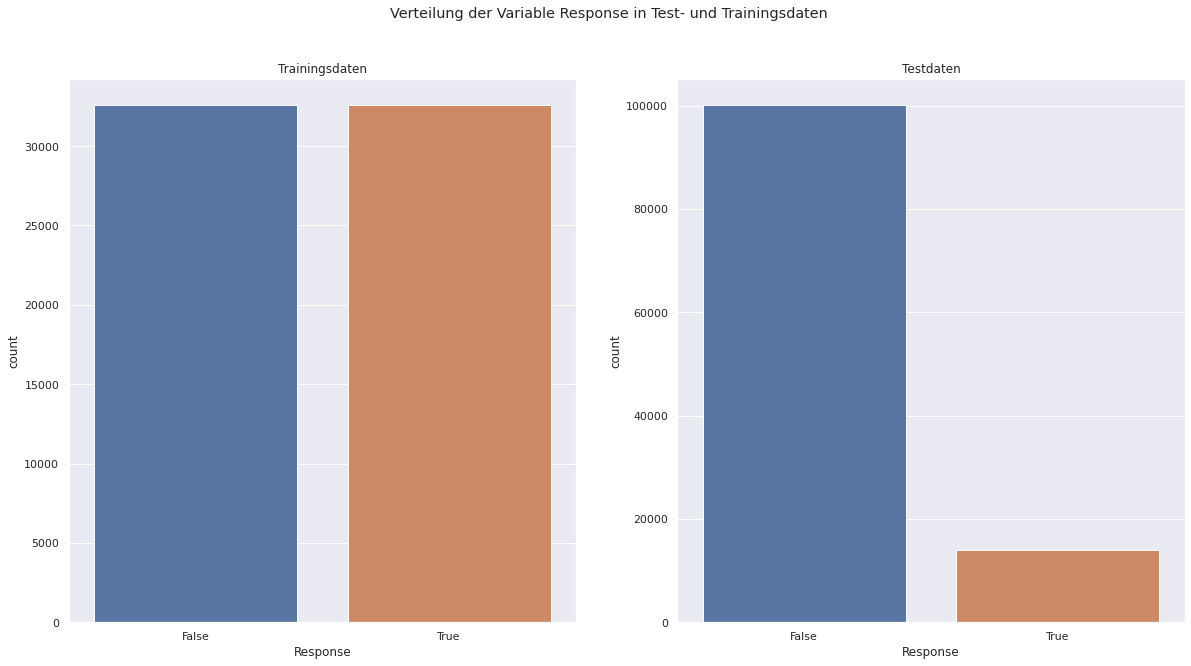

In [71]:
train_undersampling = undersample(X_train, "Response")

plot_prop_of_split(train_undersampling, X_test, "Response")


### 3.5.2. Oversampling <a class="anchor" id="section_3_4_2"></a>

In [72]:

def oversampling_dataset(imbalanced_dataset):
    #Variable "Response" values count as integer
    response_false_count, response_true_count = imbalanced_dataset["Response"].value_counts()
    
    #Seperate in bool values (True and False values)
    seperate_response_false = imbalanced_dataset[imbalanced_dataset["Response"] == False]
    seperate_response_true = imbalanced_dataset[imbalanced_dataset["Response"] == True]
    
    #Undersampling to balance imbalanced datasets --> deleting samples from the majority class
    response_true_oversampling = seperate_response_true.sample(response_false_count, replace=True)
    oversampling = pd.concat([response_true_oversampling, seperate_response_false], axis = 0)    

    return oversampling      

train_oversampling = oversampling_dataset(X_train)


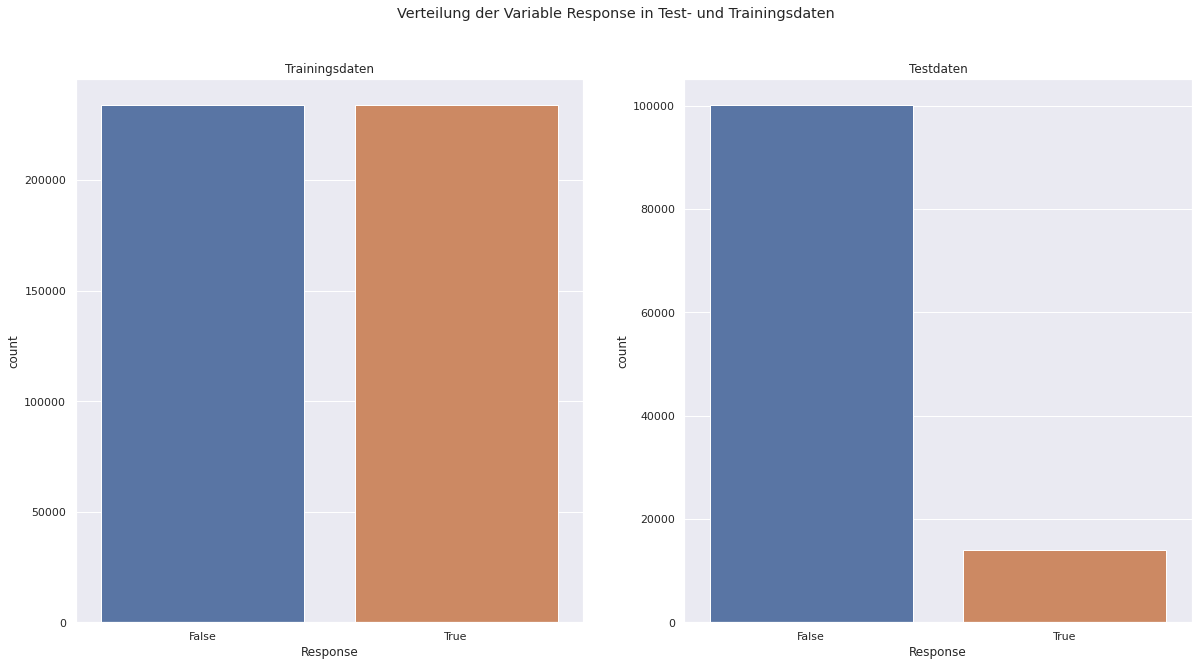

In [73]:
plot_prop_of_split(train_oversampling, X_test, "Response")


- Datensätze aus der minority_class werden durch Generierung künstlicher Beispiele aufgestockt.
    - Daraus entsteht eine identische Anzahl an Datensätzen für die Zielvariable `Response` mit den Ausprägungen True und False.
    - Der Datensatz wird balanciert, indem die gleiche Anzahl an Datensätzen von False künstlich für True erzeugt wird.

### 3.5.3. Cleanup <a class="anchor" id="section_3_5_3"></a>

Die gesplitteten Test- und Trainingsdaten mussten für das Over- und Undersampling wieder mit der Zielvariable verknüpft werden. Im Fall von Oversampling wurden neue Datensätze erzeugt und im Fall von Undersampling wurden Datensätze entfernt, um ein Gleichgewicht der Klassen zu schaffen. Beides führt dazu, dass die zuvor gesplitteten Datensätze `X_train` und `X_test` nicht mehr zu den Datensätzen der Zielvariable `y_train` und `y_test` passen.

In [74]:
# undersamplng
y_under_train = train_undersampling["Response"]

# oversampling
y_over_train = train_oversampling["Response"]
y_over_test = X_test["Response"]

Anschließend wird die Zielvariable wieder von den Test- und Trainingsdaten entfernt.

In [75]:
# undersamplng
train_undersampling = train_undersampling.drop("Response", axis="columns")

# oversampling
train_oversampling = train_oversampling.drop("Response", axis="columns")


### 3.5.4. Under- vs. Oversampling <a class="anchor" id="section_3_5_4"></a>

# #todo Welches Sampling nehmen wir?

In [76]:
# set to undersampling
X_train = train_undersampling
y_train = y_under_train

## 3.6. Feature Engineering <a class="anchor" id="section_3_5"></a>


### 3.6.1. Altersklassen als Feature <a class="anchor" id="section_3_5_1"></a>

- Eingrenzung der Variable `Age` in 8 Quantile (q=8) um die Intervalle festzustellen.
- Das Ergebnis der Funktion ".qcut" ist eine Variable des Datentypes "Category" da jedes Intervall (bin) einer Kategorie entspricht.
- Die Kategorien sind in einer mathematischen Notation beschrieben.
    - (exklusive, inklusive]
- Der Kategorien der Variable `Age_bin` sind:
    - (19.999,23] < (23,25] < (25,28] < (28,37] < (37,43] < (43,49] < (49,59] < (59,85]

In [77]:
X_train['Age_bins'] = pd.qcut(train.Age, q=8)
X_train['Age_bins'].value_counts().sort_index()

X_test['Age_bins'] = pd.qcut(train.Age, q=8)
X_test['Age_bins'].value_counts().sort_index()

(19.999, 23.0]    19800
(23.0, 25.0]      13512
(25.0, 28.0]       9679
(28.0, 36.0]      12894
(36.0, 43.0]      14301
(43.0, 49.0]      13312
(49.0, 59.0]      13995
(59.0, 85.0]      13499
Name: Age_bins, dtype: int64

In [78]:
X_train.isna().sum()

Gender                     0
Age                        0
Driving_License            0
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Vintage                    0
Age_bins                1901
dtype: int64

<Figure size 1584x720 with 0 Axes>

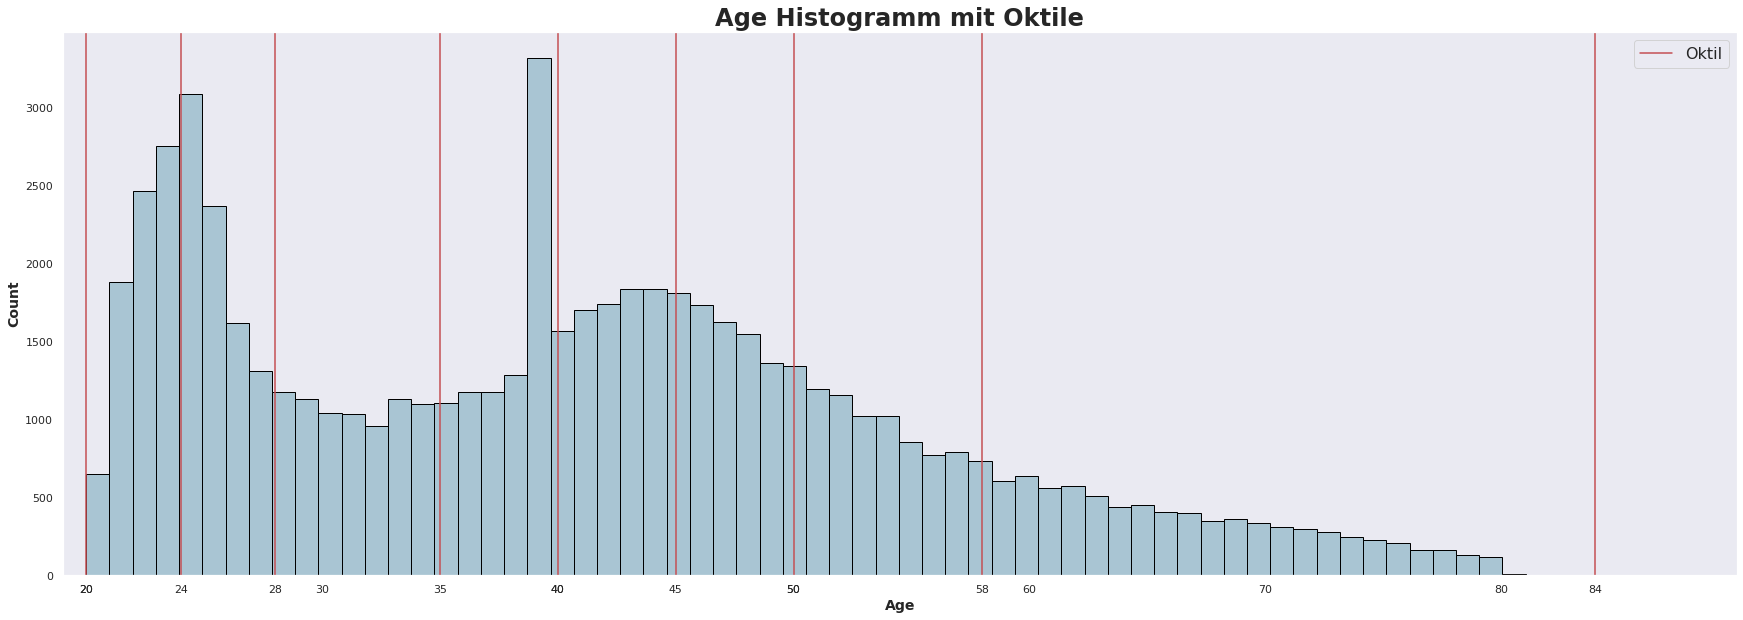

In [79]:
octiles_list = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1]

octiles = X_train["Age"].quantile(octiles_list)

plt.figure(figsize= (22, 10))
fig, ax = plt.subplots()
X_train['Age'].hist(bins=65, color='#A9C5D3', 
                             edgecolor='black', grid=False)

for quantile in octiles:
    axvlineplot = plt.axvline(quantile, color='r')
ax.legend([axvlineplot], ['Oktil'], fontsize=16)

ax.set_title('Age Histogramm mit Oktile', 
             fontsize=24, weight="bold")
ax.set_xlabel('Age', fontsize=14, weight="bold")
ax.set_ylabel('Count', fontsize=14, weight="bold")

# start graph just before 20 (no smaller values)
ax.set_xlim(19, 90)

# show ticks at octiles and steps of 10
ax.set_xticks([*octiles.to_numpy(), *range(20,90,10)]); # ; prevents output in console

- Zur besseren Leserlichkeit wurden die Kategorien mit dem Parameter "labels" händisch eingeteilt, dabei ist darauf zu achten welche Werte exklusiv und inklusiv sind.

In [80]:
def numerical_binning(data):
        data['Age_bins'] = pd.qcut(
            data.Age, q=8, labels=[ ("20-23"),("24-25"),("26-28"),("29-37"),("38-43"),("44-49"),("50-59"),("60-85")]
            )
        return data['Age_bins'].value_counts().sort_index()

numerical_binning(X_test)
numerical_binning(X_train)


20-23    10844
24-25     6472
26-28     7502
29-37     8532
38-43     8929
44-49     7617
50-59     7549
60-85     7781
Name: Age_bins, dtype: int64

In [81]:
X_train["Age"].quantile(octiles_list)

0.000    20.0
0.125    24.0
0.250    28.0
0.375    35.0
0.500    40.0
0.625    45.0
0.750    50.0
0.875    58.0
1.000    84.0
Name: Age, dtype: float64

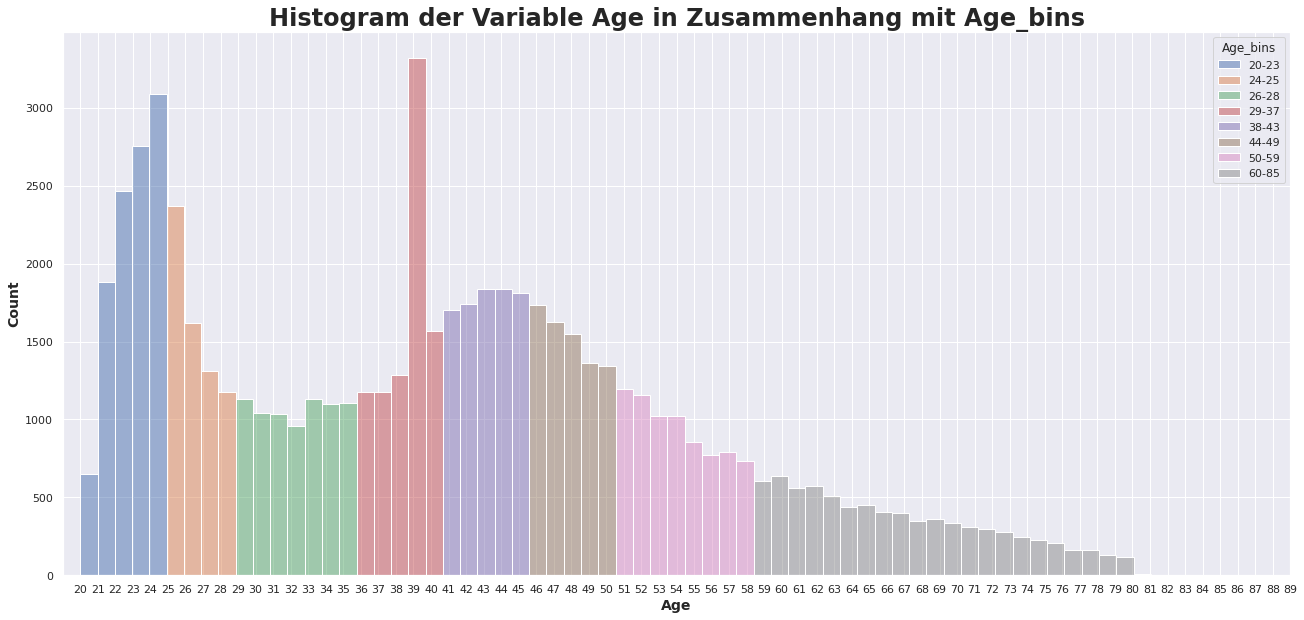

In [82]:
sns.set(rc={"figure.figsize": (22, 10)})
histplot =sns.histplot(X_train, x="Age", hue="Age_bins", bins=65)

histplot.set_title('Histogram der Variable Age in Zusammenhang mit Age_bins', 
             fontsize=24, weight="bold")
histplot.set_xlabel('Age', fontsize=14, weight="bold")
histplot.set_ylabel('Count', fontsize=14, weight="bold")
histplot.set_xlim(19, 85)
histplot.set_xticks(range(20,90,1));

### 3.6.2 Features durch Aggregationen, Differenzen und Verhältnisse <a class="anchor" id="section_3_6_2"></a>

In [83]:
def feature_encoding(data, col_name):
    selected_categorical_columns = data.select_dtypes(include = ["category"])
    for categorical_columns in selected_categorical_columns:
        
        #mean encoding using Annual_Premium as the numeric variable// 
        #group by categorical variables and obtain the mean over the numeric variable
        mean = data.groupby(categorical_columns)[col_name].agg(['mean'])
        mean.columns = [f'mean_{col_name}_by_' + categorical_columns]

        #joining the column mean_Annual_Premium_by_ to the main dataset (data)
        data = pd.merge(data, mean, left_on = categorical_columns, right_index=True, how = 'left')

        #difference between the numerical variable Annual_Premium and the mean grouped by the categorical variables over the numeric one.
        data[f"diff_{col_name}_mean_by_" + categorical_columns] = data[col_name] - data[f"mean_{col_name}_by_" + categorical_columns]

        #percentage of the difference
        data[f"prop_{col_name}_mean_by_" + categorical_columns] = data[f"diff_{col_name}_mean_by_" + categorical_columns].abs() / data[f'mean_{col_name}_by_' + categorical_columns]
    return data

# Testdata
for col in X_test.select_dtypes(include=["number"], exclude=["bool", "boolean"]):
    print(f"Creating features for {col}")
    X_test = feature_encoding(X_test, col)

# Traindata
for col in X_train.select_dtypes(include=["number"], exclude=["bool", "boolean"]):
    print(f"Creating features for {col}")
    X_train = feature_encoding(X_train, col)

Creating features for Age
Creating features for Annual_Premium
Creating features for Vintage
Creating features for Age
Creating features for Annual_Premium
Creating features for Vintage


In [84]:
X_train.loc[X_train["mean_Age_by_Age_bins"].isna()]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,...,prop_Vintage_mean_by_Region_Code,mean_Vintage_by_Vehicle_Age,diff_Vintage_mean_by_Vehicle_Age,prop_Vintage_mean_by_Vehicle_Age,mean_Vintage_by_Policy_Sales_Channel,diff_Vintage_mean_by_Policy_Sales_Channel,prop_Vintage_mean_by_Policy_Sales_Channel,mean_Vintage_by_Age_bins,diff_Vintage_mean_by_Age_bins,prop_Vintage_mean_by_Age_bins


In [85]:
pd.set_option('display.max_columns', 100)
X_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_bins,mean_Age_by_Gender,diff_Age_mean_by_Gender,prop_Age_mean_by_Gender,mean_Age_by_Region_Code,diff_Age_mean_by_Region_Code,prop_Age_mean_by_Region_Code,mean_Age_by_Vehicle_Age,diff_Age_mean_by_Vehicle_Age,prop_Age_mean_by_Vehicle_Age,mean_Age_by_Policy_Sales_Channel,diff_Age_mean_by_Policy_Sales_Channel,prop_Age_mean_by_Policy_Sales_Channel,mean_Age_by_Age_bins,diff_Age_mean_by_Age_bins,prop_Age_mean_by_Age_bins,mean_Annual_Premium_by_Gender,diff_Annual_Premium_mean_by_Gender,prop_Annual_Premium_mean_by_Gender,mean_Annual_Premium_by_Region_Code,diff_Annual_Premium_mean_by_Region_Code,prop_Annual_Premium_mean_by_Region_Code,mean_Annual_Premium_by_Vehicle_Age,diff_Annual_Premium_mean_by_Vehicle_Age,prop_Annual_Premium_mean_by_Vehicle_Age,mean_Annual_Premium_by_Policy_Sales_Channel,diff_Annual_Premium_mean_by_Policy_Sales_Channel,prop_Annual_Premium_mean_by_Policy_Sales_Channel,mean_Annual_Premium_by_Age_bins,diff_Annual_Premium_mean_by_Age_bins,prop_Annual_Premium_mean_by_Age_bins,mean_Vintage_by_Gender,diff_Vintage_mean_by_Gender,prop_Vintage_mean_by_Gender,mean_Vintage_by_Region_Code,diff_Vintage_mean_by_Region_Code,prop_Vintage_mean_by_Region_Code,mean_Vintage_by_Vehicle_Age,diff_Vintage_mean_by_Vehicle_Age,prop_Vintage_mean_by_Vehicle_Age,mean_Vintage_by_Policy_Sales_Channel,diff_Vintage_mean_by_Policy_Sales_Channel,prop_Vintage_mean_by_Policy_Sales_Channel,mean_Vintage_by_Age_bins,diff_Vintage_mean_by_Age_bins,prop_Vintage_mean_by_Age_bins
59752,Male,36.0,True,11.0,True,1-2 Year,False,44120.0,124.0,121,29-37,42.307871,-6.307871,0.149095,37.687264,-1.687264,0.044770,47.040833,-11.040833,0.234707,44.790943,-8.790943,0.196266,38.304202,-2.304202,0.060155,31048.740733,13071.259267,0.420992,26845.725216,17274.274784,0.643465,30859.433118,13260.566882,0.429709,31844.361255,12275.638745,0.385489,29759.457220,14360.542780,0.482554,154.691290,-33.691290,0.217797,152.835662,-31.835662,0.208300,154.270445,-33.270445,0.215663,154.452514,-33.452514,0.216588,156.274613,-35.274613,0.225722
140611,Male,43.0,False,28.0,False,> 2 Years,True,2630.0,26.0,162,38-43,42.307871,0.692129,0.016359,45.795688,-2.795688,0.061047,53.078220,-10.078220,0.189875,49.090943,-6.090943,0.124075,43.035166,-0.035166,0.000817,31048.740733,-28418.740733,0.915294,38819.641246,-36189.641246,0.932251,37144.583564,-34514.583564,0.929196,34895.137285,-32265.137285,0.924631,31694.472729,-29064.472729,0.917020,154.691290,7.308710,0.047247,154.985648,7.014352,0.045258,155.133057,6.866943,0.044265,154.003918,7.996082,0.051921,153.050174,8.949826,0.058476
109753,Female,26.0,True,13.0,True,< 1 Year,False,23592.0,152.0,227,24-25,38.647789,-12.647789,0.327258,34.480561,-8.480561,0.245952,25.655820,0.344180,0.013415,26.580360,-0.580360,0.021834,26.199938,-0.199938,0.007631,31001.221473,-7409.221473,0.238998,24790.599359,-1198.599359,0.048349,30062.072815,-6470.072815,0.215224,30884.602697,-7292.602697,0.236124,29456.617120,-5864.617120,0.199093,153.949401,73.050599,0.474510,154.195513,72.804487,0.472157,154.423902,72.576098,0.469980,154.692521,72.307479,0.467427,155.764988,71.235012,0.457324
311539,Female,24.0,True,50.0,True,< 1 Year,False,2630.0,152.0,108,20-23,38.647789,-14.647789,0.379007,39.067073,-15.067073,0.385672,25.655820,-1.655820,0.064540,26.580360,-2.580360,0.097078,22.530432,1.469568,0.065226,31001.221473,-28371.221473,0.915165,30189.318745,-27559.318745,0.912883,30062.072815,-27432.072815,0.912514,30884.602697,-28254.602697,0.914844,30334.915806,-27704.915806,0.913301,153.949401,-45.949401,0.298471,150.858497,-42.858497,0.284097,154.423902,-46.423902,0.300626,154.692521,-46.692521,0.301841,154.724640,-46.724640,0.301986
322384,Female,27.0,True,44.0,True,< 1 Year,False,23432.0,152.0,21,24-25,38.647789,-11.647789,0.301383,34.332909,-7.332909,0.213583,25.655820,1.344180,0.052393,26.580360,0.419640,0.015788,26.199938,0.800062,0.030537

### 3.6.3 weitere Features <a class="anchor" id="section_3_6_3"></a>

# WOHIN MIT MIR???
Konvertieren von kategorialen Variablen in Dummy/Indikator-Variablen

In [86]:
# test
X_test = pd.concat([X_test, pd.get_dummies(X_test["Gender"], prefix="Gender_is_")], axis=1)
X_test = pd.concat([X_test, pd.get_dummies(X_test["Vehicle_Age"], prefix="Vehicle_Age_is_")], axis=1)
X_test = pd.concat([X_test, pd.get_dummies(X_test["Age_bins"], prefix="Age_bins_is")], axis=1)
X_test = X_test.loc[:,~X_test.columns.duplicated()]

# train
X_train = pd.concat([X_train, pd.get_dummies(X_train["Gender"], prefix="Gender_is_")], axis=1)
X_train = pd.concat([X_train, pd.get_dummies(X_train["Vehicle_Age"], prefix="Vehicle_Age_is_")], axis=1)
X_train = pd.concat([X_train, pd.get_dummies(X_train["Age_bins"], prefix="Age_bins_is")], axis=1)
X_train = X_train.loc[:,~X_train.columns.duplicated()]
print(f"Wir starten mit {len(X_train.columns)} Features in die Featureselektion")

Wir starten mit 69 Features in die Featureselektion


## 3.7 Feature Selection <a class="anchor" id="section_3_7"></a>

- Bei der Feature Selection wählen wir die Features aus, die für den machine-learning-process verwendet werden. 
- Hierbei ist darauf zu achten, dass nur relevante Features zur Modellbildung verwendet werden sollten, da sonst eine Überanpassung des Modells stattfinden kann.
- Durch die neu hinzugekommenen Features aus dem Feature Engineering umfasst der Datensatz nun 69 Spalten.

In [87]:
pd.set_option('display.max_columns', 100)
X_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_bins,mean_Age_by_Gender,diff_Age_mean_by_Gender,prop_Age_mean_by_Gender,mean_Age_by_Region_Code,diff_Age_mean_by_Region_Code,prop_Age_mean_by_Region_Code,mean_Age_by_Vehicle_Age,diff_Age_mean_by_Vehicle_Age,prop_Age_mean_by_Vehicle_Age,mean_Age_by_Policy_Sales_Channel,diff_Age_mean_by_Policy_Sales_Channel,prop_Age_mean_by_Policy_Sales_Channel,mean_Age_by_Age_bins,diff_Age_mean_by_Age_bins,prop_Age_mean_by_Age_bins,mean_Annual_Premium_by_Gender,diff_Annual_Premium_mean_by_Gender,prop_Annual_Premium_mean_by_Gender,mean_Annual_Premium_by_Region_Code,diff_Annual_Premium_mean_by_Region_Code,prop_Annual_Premium_mean_by_Region_Code,mean_Annual_Premium_by_Vehicle_Age,diff_Annual_Premium_mean_by_Vehicle_Age,prop_Annual_Premium_mean_by_Vehicle_Age,mean_Annual_Premium_by_Policy_Sales_Channel,diff_Annual_Premium_mean_by_Policy_Sales_Channel,prop_Annual_Premium_mean_by_Policy_Sales_Channel,mean_Annual_Premium_by_Age_bins,diff_Annual_Premium_mean_by_Age_bins,prop_Annual_Premium_mean_by_Age_bins,mean_Vintage_by_Gender,diff_Vintage_mean_by_Gender,prop_Vintage_mean_by_Gender,mean_Vintage_by_Region_Code,diff_Vintage_mean_by_Region_Code,prop_Vintage_mean_by_Region_Code,mean_Vintage_by_Vehicle_Age,diff_Vintage_mean_by_Vehicle_Age,prop_Vintage_mean_by_Vehicle_Age,mean_Vintage_by_Policy_Sales_Channel,diff_Vintage_mean_by_Policy_Sales_Channel,prop_Vintage_mean_by_Policy_Sales_Channel,mean_Vintage_by_Age_bins,diff_Vintage_mean_by_Age_bins,prop_Vintage_mean_by_Age_bins,Gender_is__Female,Gender_is__Male,Vehicle_Age_is__1-2 Year,Vehicle_Age_is__< 1 Year,Vehicle_Age_is__> 2 Years,Age_bins_is_20-23,Age_bins_is_24-25,Age_bins_is_26-28,Age_bins_is_29-37,Age_bins_is_38-43,Age_bins_is_44-49,Age_bins_is_50-59,Age_bins_is_60-85
59752,Male,36.0,True,11.0,True,1-2 Year,False,44120.0,124.0,121,29-37,42.307871,-6.307871,0.149095,37.687264,-1.687264,0.044770,47.040833,-11.040833,0.234707,44.790943,-8.790943,0.196266,38.304202,-2.304202,0.060155,31048.740733,13071.259267,0.420992,26845.725216,17274.274784,0.643465,30859.433118,13260.566882,0.429709,31844.361255,12275.638745,0.385489,29759.457220,14360.542780,0.482554,154.691290,-33.691290,0.217797,152.835662,-31.835662,0.208300,154.270445,-33.270445,0.215663,154.452514,-33.452514,0.216588,156.274613,-35.274613,0.225722,0,1,1,0,0,0,0,0,1,0,0,0,0
140611,Male,43.0,False,28.0,False,> 2 Years,True,2630.0,26.0,162,38-43,42.307871,0.692129,0.016359,45.795688,-2.795688,0.061047,53.078220,-10.078220,0.189875,49.090943,-6.090943,0.124075,43.035166,-0.035166,0.000817,31048.740733,-28418.740733,0.915294,38819.641246,-36189.641246,0.932251,37144.583564,-34514.583564,0.929196,34895.137285,-32265.137285,0.924631,31694.472729,-29064.472729,0.917020,154.691290,7.308710,0.047247,154.985648,7.014352,0.045258,155.133057,6.866943,0.044265,154.003918,7.996082,0.051921,153.050174,8.949826,0.058476,0,1,0,0,1,0,0,0,0,1,0,0,0
109753,Female,26.0,True,13.0,True,< 1 Year,False,23592.0,152.0,227,24-25,38.647789,-12.647789,0.327258,34.480561,-8.480561,0.245952,25.655820,0.344180,0.013415,26.580360,-0.580360,0.021834,26.199938,-0.199938,0.007631,31001.221473,-7409.221473,0.238998,24790.599359,-1198.599359,0.048349,30062.072815,-6470.072815,0.215224,30884.602697,-7292.602697,0.236124,29456.617120,-5864.617120,0.199093,153.949401,73.050599,0.474510,154.195513,72.804487,0.472157,154.423902,72.576098,0.469980,154.692521,72.307479,0.467427,155.764988,71.235012,0.457324,1,0,0,1,0,0,1,0,0,0,0,0,0
311539,Female,24.0,True,50.0,True,< 1 Year,False,2630.0,152.0,108,20-23,38.647789,-14.647789,0.379007,39.067073,-15.067073,0.385672,25.655820,-1.655820,0.064540,26.580360,-2.580360,0.097078,22.530432,1.469568,0.065226,31001.221473,-28371.221473,0.915165,30189.318745,-27559.318745,0.912883,30062.072815,-27432.072815,0.912514,30884.602697,-28254.602697,0.914844,30334.915806,-27704.915806,0.913301,153.949401,-45.949401,0.298471,150.85

- Um sich eine Übersicht über die Variablen zu verschaffen wird ein Korrelationsplot genutzt, damit die Abhängigkeiten der einzelnen Variablen betrachtet werden können.
- Variablen die eine zu hohe Korrelaton vorweisen, werden aus dem Datensatz entfernt da sich diese negativ auf die Modellierung auswirken können.
- Der folgende Korrelationsplot berücksichtigt alle Variablen.

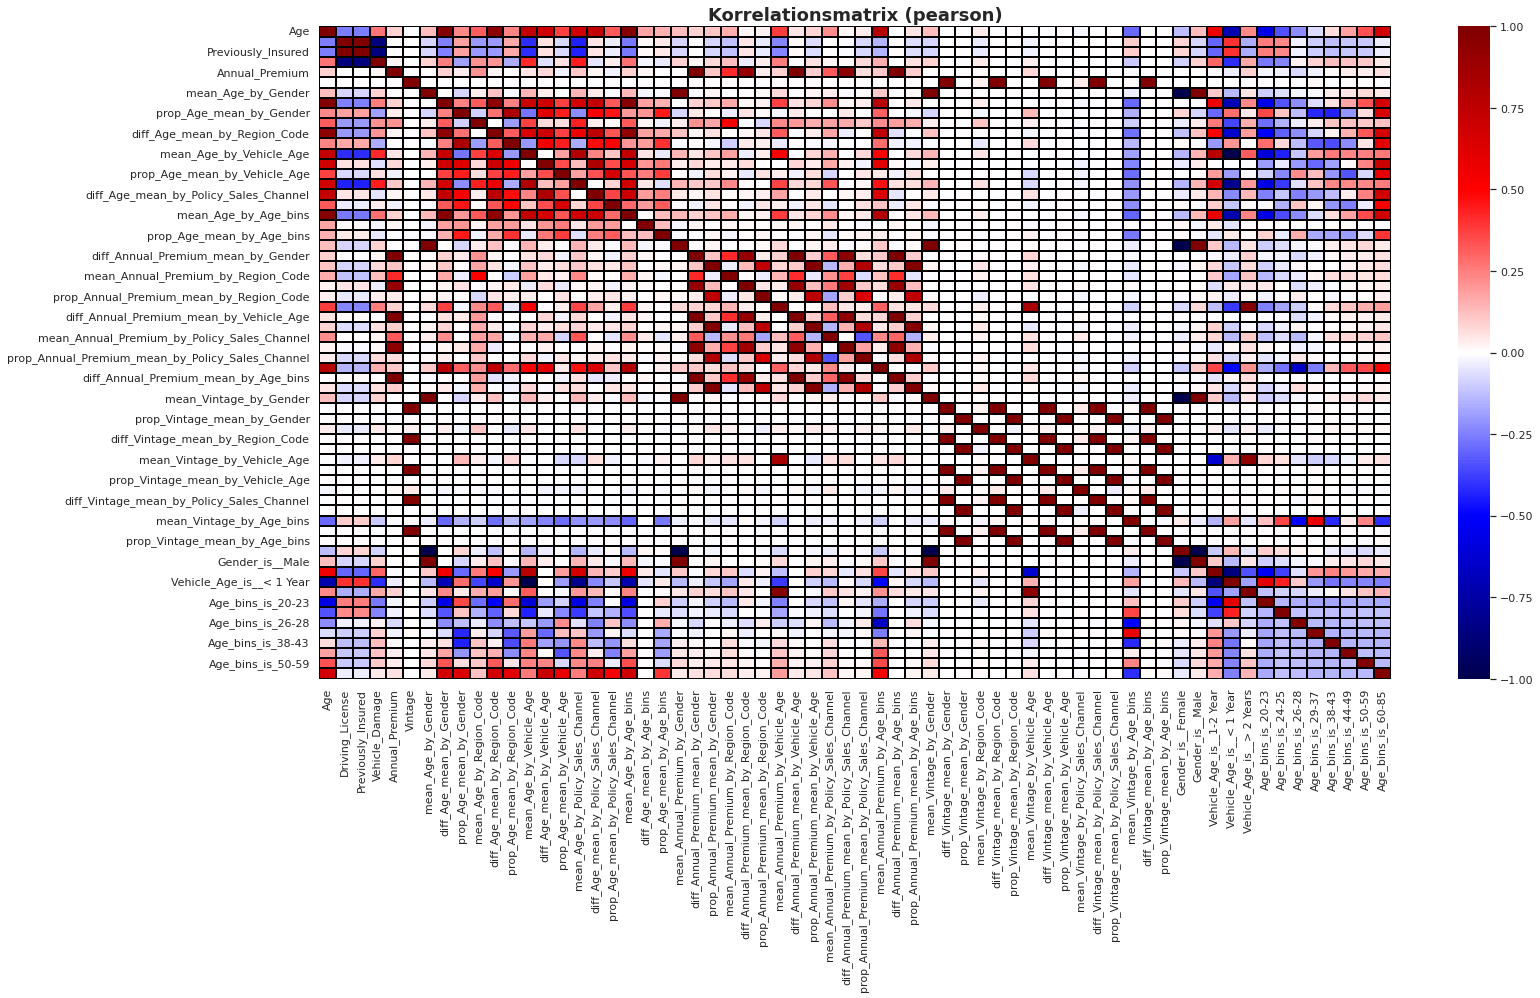

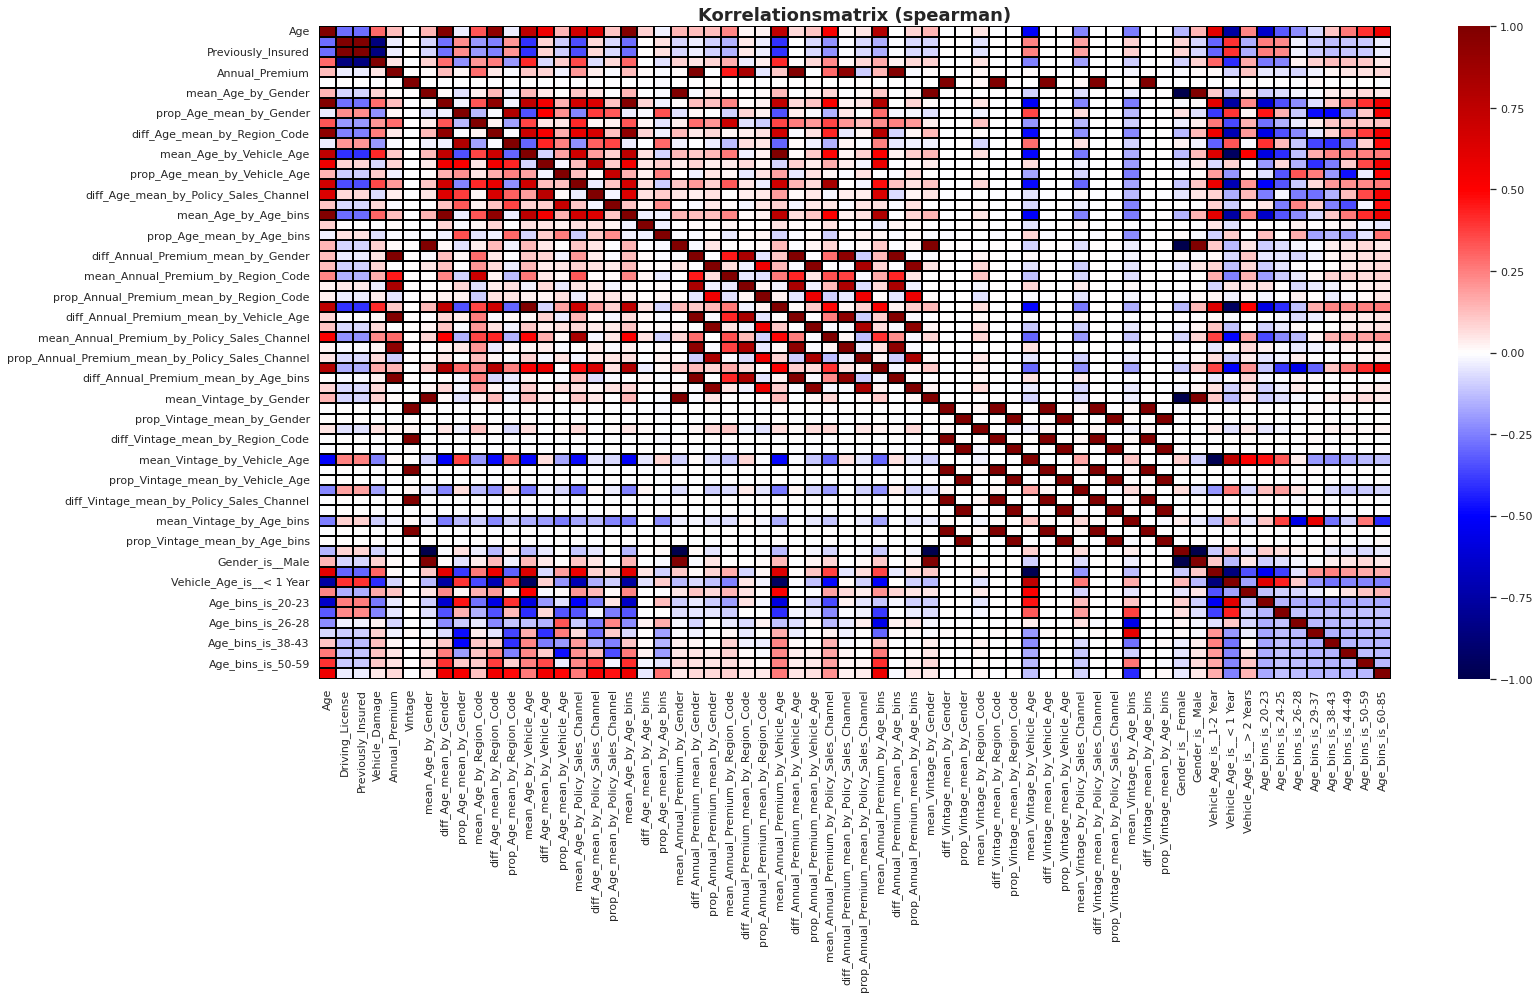

In [88]:
# korrelation aller Variablen
correlation_matrix(X_train, 24, 12, False, "seismic", "pearson")
correlation_matrix(X_train, 24, 12, False, "seismic", "spearman")


Text(0.5, 1.0, 'Abweichungen zwischen Spearman und Pearson')

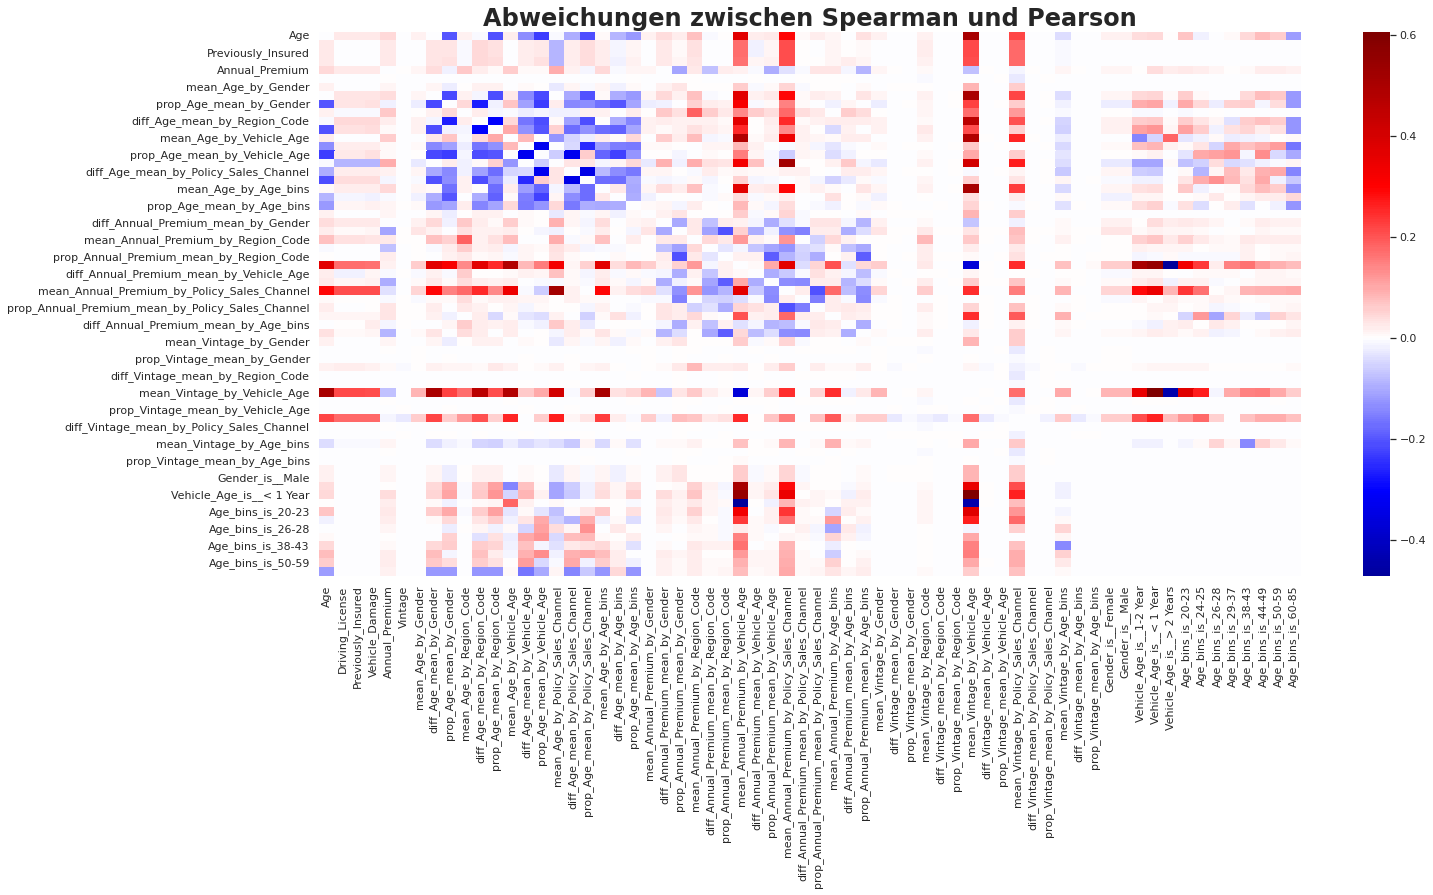

In [89]:
pearson = X_train.corr(method="pearson")
spearman = X_train.corr(method="spearman")

delta = spearman.abs() - pearson.abs()
hm = sns.heatmap(delta, cmap="seismic", center=0)
hm.set_title("Abweichungen zwischen Spearman und Pearson",
             fontsize=24, weight="bold")


Bei der Feature Selection wird die Spearman-Korrelation verwendet. Da diese ohne Betrachtung der Abstände der einzelnen Werte auskommt, ist sie inklusiver als die Pearson-Korrelation.

In [90]:
# Feature selection auf Basis zu hoher Korrelation
def get_columns_with_high_correlations(data: pd.DataFrame, threshold, corr_method):
    corr = data.corr(method=corr_method)

    corr = corr.abs().unstack()
    corr = corr.reset_index()
    # columns have 1.0 correlation with themselves -> filter those
    corr = corr.loc[corr["level_0"] != corr["level_1"]]
    corr = corr.loc[corr[0].abs() > threshold]

    return corr["level_0"].drop_duplicates().to_numpy()


def drop_columns_with_high_correlation(data: pd.DataFrame, threshold, corr_method):
    cols = get_columns_with_high_correlations(data, threshold, corr_method)
    data = data.drop(cols, axis=1)
    print(f"Removed {len(cols)} features using method: {corr_method} and threshold: {threshold}")
    return data

Um die Feature Selection durchführen zu können, muss der Datensatz auf numerische Daten reduziert werden. Die Vorbereitungen hierzu wurden bereits im Abschnitt Data Preparation getroffen.

In [91]:
feature_test = X_test.select_dtypes(["number", "boolean"])
feature_train = X_train.select_dtypes(["number", "boolean"])
len(feature_train.columns)


64

### 3.7.1 Feature Selection anhand von Korrelation <a class="anchor" id="section_3_7_1"></a>

Features mit zu hohen Korrelationen untereinander können als redundant betrachtet werden. Nachfolgend werden alle Features mit einer Korrelation über einem Threshold entfernt. Der Threshold wird bestimmt, indem er nach und nach (von 1 aus kommend) verringert wird.
- Daher werden alle Variablen mit einem `threshold` von <= - 0,9 und >= 0,9 entfernt.
- Bei der Pearson-Methode werden 36 features entfernt.
- Bei der Spearman-Methode werden 35 features entfernt.

In [92]:
# Feature selection by highest korrelation pruning

# RUN THIS ONLY FOR FINDING THRESHOLD
# try to find propper threshold
# for thresh in [0.9, 0.8, 0.7]:
#     drop_columns_with_high_correlation(
#         feature_train, thresh, "pearson")

#     drop_columns_with_high_correlation(
#         feature_train, thresh, "spearman")

# perform feature selection on data with selected threshold
corr_thresh = 0.9
pearson = drop_columns_with_high_correlation(
    feature_train, corr_thresh, "pearson")

spearman = drop_columns_with_high_correlation(
    feature_train, corr_thresh, "spearman")

# select feature set to continue with
pruned_feature_train = spearman


Removed 36 features using method: pearson and threshold: 0.9
Removed 35 features using method: spearman and threshold: 0.9


In [93]:
print(f"Es verbleiben {len(pruned_feature_train.columns)} Features")


Es verbleiben 29 Features


- Nach der Bereinigung des Datensatzes sind alle Variablen mit einem `threshold` von <= - 0,9 und >= 0,9 entfernt worden, wie am nachfolgenden Korrelationsplot ersichtlich ist.


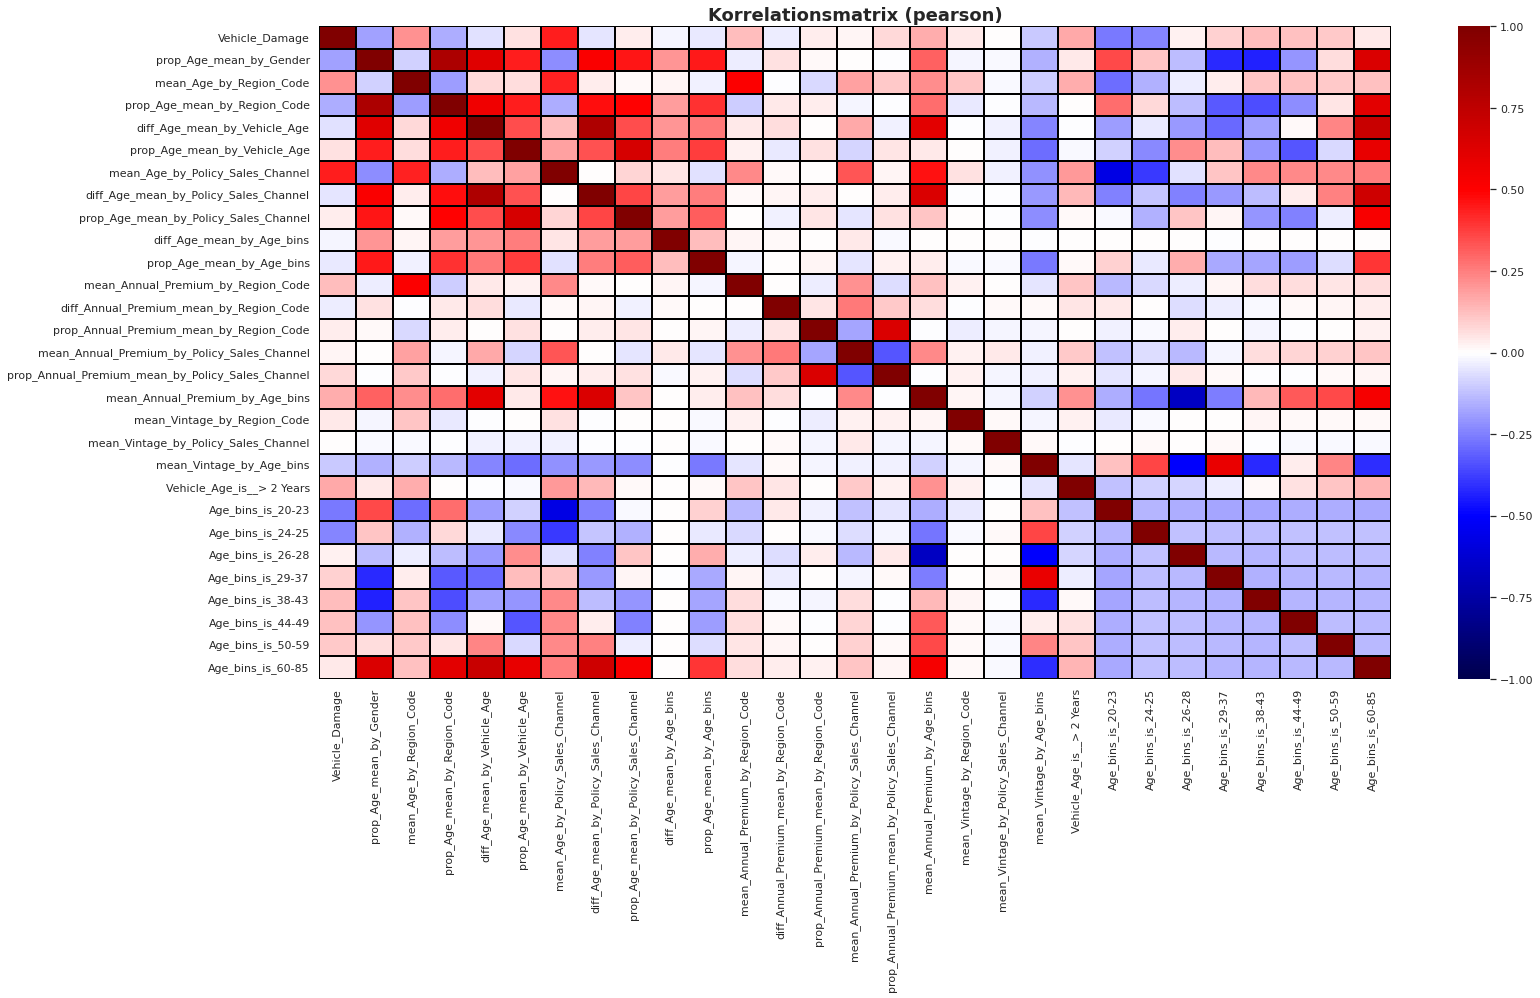

In [94]:
correlation_matrix(pruned_feature_train, 24, 12, False, "seismic")


### 3.7.2 Feature Importance durch Logistische Regression <a class="anchor" id="section_3_7_2"></a>

Bei der Ermittlung der Feature Importance werden die Features mithilfe logistischer Regression analysiert. Dabei werden die Koeffizienten der einzelnen Variablen in Abhängigkeit zu der Zielvariable `Response` betrachtet. Daraus lässt sich der R-Wert ermitteln. Auch hier wird ein Grenzwert benötigt, der zwischen unwichtigen und wichtigen Features unterscheidet. Dieser Threshold kann nach Betrachtung der Feature Importance am besten eingeschätzt werden.

|    **R-Wert**          | **Erklärung**  | 
|          :-:           |         :-        |
|       >0              |- Wenn der R-Wert >0 ist dann hat die Variable einen tendenziell positiven Einfluss darauf das eine KFZ-Versicherung abgeschlossen wird.| 
|         <0              |- Wenn der R-Wert <0 ist dann hat die Variable einen tendenziell negativen Einfluss darauf das eine KFZ-Versicherung abgeschlossen wird.| 
|  =0                 |- Wenn der R-Wert =0 ist dann hat die Variable weder einen tendenziell positiven, noch negativen Einfluss darauf, dass eine KFZ-Versicherung abgeschlossen wird.| 



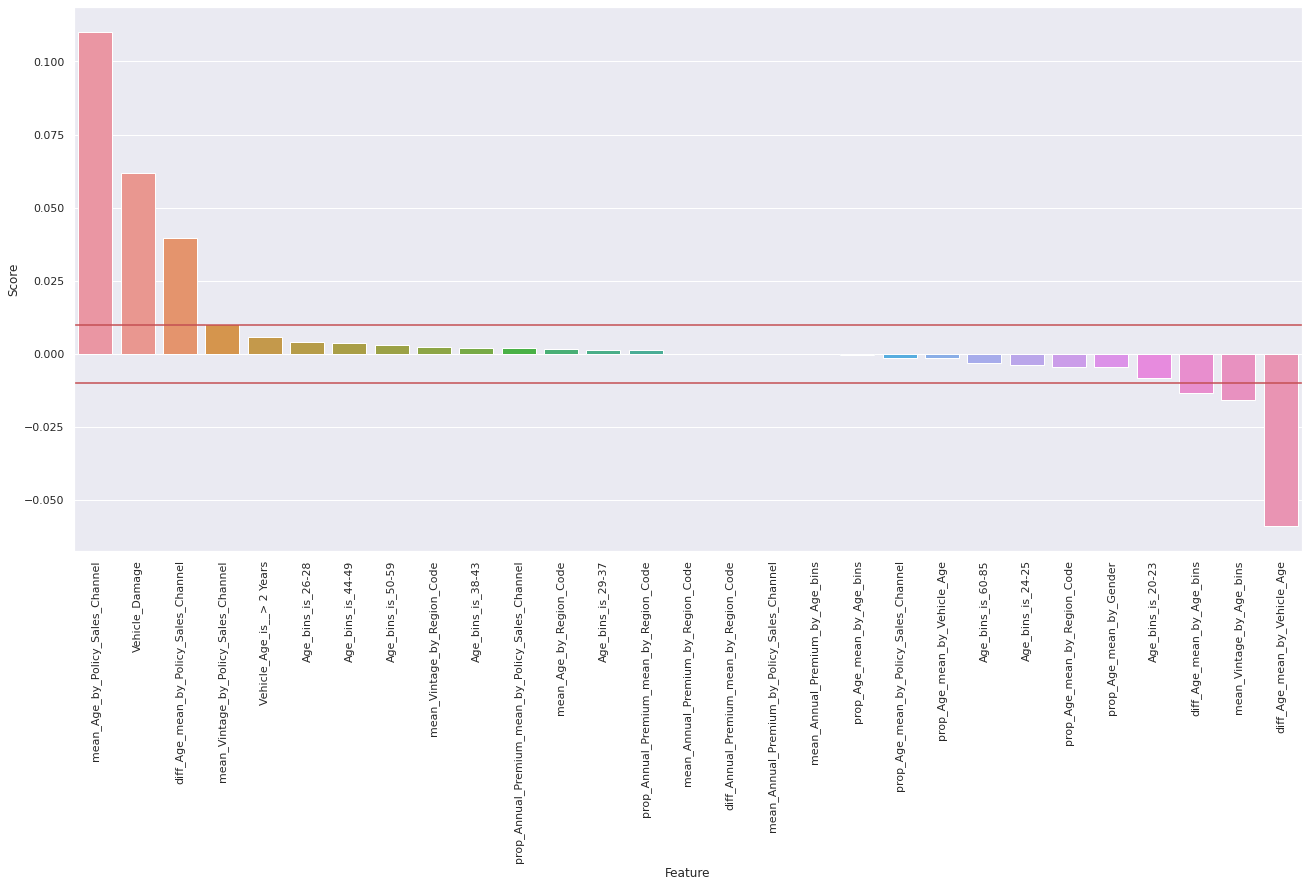

In [95]:
# Feature importance
# linear regression feature importance

feat_imp_thresh = 0.01

# define the model
model = LogisticRegression(max_iter=1000)
# fit the model
model.fit(pruned_feature_train, y_train)
# get importance
importance = model.coef_[0]

i = pd.DataFrame(importance)
i["Feature"] = pruned_feature_train.columns
i = i.rename(columns={0: "Score"})

# # summarize feature importance
# for i, v in enumerate(importance):
#     print('Feature: %0d %s, Score: %.5f' %
#           (i, pruned_feature_train.columns[i], v))
# plot feature importance
i = i.sort_values("Score", ascending=False)
b = sns.barplot(x="Feature", y="Score", data=i)
b.tick_params(axis='x', rotation=90)
b.axhline(feat_imp_thresh, color="r")
b.axhline(-feat_imp_thresh, color="r")


Nach der Untersuchung der Feature Importance bleiben nur wenige Features für die Modellierung übrig.

In [96]:
relevant_features = i.loc[i["Score"].abs() > feat_imp_thresh]

# train
modelling_data_train = pruned_feature_train[relevant_features["Feature"]]

# test
modelling_data_test = feature_test[relevant_features["Feature"]]


# 4. Modeling <a class="anchor" id="chapter4"></a>

In [97]:
predictions = [None, None, None]


## 4.1 Modell: Random Forest <a class="anchor" id="chapter4_1"></a>

In [118]:
# use all features
pruned_modelling_data_test = feature_test[pruned_feature_train.columns]

clf = RandomForestClassifier(
    bootstrap=False,
    class_weight=None,
    criterion='gini',
    max_depth=None,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=1000,
    n_jobs=1,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False)
clf.fit(modelling_data_train, y_train)
y_pred = clf.predict(modelling_data_test)
predictions[0] = {"Prediction": y_pred, "Name": "Random Forest"}

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.667812923830774


## 4.2 Modell: Neuronales Netz <a class="anchor" id="chapter4_2"></a>

* Solver: Stochastic gradient descent (SGD); iteratives Verfahren der Optimierung; besonders schnell bei großen Datensätzen

* Activation: tanh; die hyperbolische tan Funktion => f(x) = tanh(x).

In [111]:

MLPClass = MLPClassifier(solver='sgd', alpha=1e-5, activation="tanh",
                     hidden_layer_sizes=(150, 100, 50), random_state=True, warm_start=False)
MLPClass.fit(modelling_data_train, y_train)

#predict
y_pred = MLPClass.predict(modelling_data_test)

#
predictions[1] = {"Prediction": y_pred, "Name": "Neuronales Netz"}

#outcome
print("Accuracy:", MLPClass.score(modelling_data_test, y_test))

Accuracy: 0.5936649604060026


## 4.3 Modell: Gradient Boosting <a class="anchor" id="chapter4_3"></a>

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
# max_depth = controls tree size
# max_leaf_nodes = controls tree size
clf = GradientBoostingClassifier(
    n_estimators=500, learning_rate=0.5, max_depth=7, random_state=0)
clf.fit(modelling_data_train, y_train)

# predict
y_pred = clf.predict(modelling_data_test)
predictions[2] = {"Prediction": y_pred, "Name": "Gradient Boosting"}

print("Accuracy:", clf.score(modelling_data_test, y_test))


Accuracy: 0.6849105306908169


# 5 Evaluation <a class="anchor" id="chapter5"></a>

In [182]:
def get_confusion_matrix(y_test, y_prediction):
    matrix = metrics.confusion_matrix(y_test, y_prediction)

    matrix = np.append(matrix, [np.sum(matrix, axis=0)], axis=0)
    col = np.array([np.sum(matrix, axis=1)])
    matrix = np.concatenate((matrix, col.T), axis=1)

    return matrix


def get_scores(y_test, y_prediction):
    matrix = metrics.confusion_matrix(y_test, y_prediction)

    TN = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TP = matrix[1][1]

    # Recall / Sensitivität / True Positive Rate / Trefferquote
    TPR = TP / (TP + FN)

    # Anteil der fälschlich als negativ klassifizierten Beobachtungen
    FNR = 1 - TPR

    # Spezifizität
    TNR = TN / (TN + FP)

    # False Positive Rate
    FPR = 1 - TNR

    return matrix, TPR, FNR, TNR, FPR


def plot_scores(data: pd.DataFrame):
    y_ticks = np.linspace(0, 1, 11)
    fig, ax = plt.subplots(1, 6, sharey=True)

    d_real = pd.DataFrame(y_test)
    vc = pd.DataFrame(d_real["Response"].value_counts() / len(d_real))

    p_real = sns.barplot(data=vc, x="Response", y="Response", ax=ax[0], palette=sns.color_palette('binary_r', 2))
    p_real.set_title("Realität")
    p_real.set_xticklabels(["True", "False"])
    p_real.set_xlabel("")
    p_real.set_ylabel("")

    p_TPR = sns.barplot(data=data, x="Name", y="TPR", ax=ax[1])
    p_TPR.set_yticks(y_ticks)
    p_TPR.set_title("True Positive Rate")
    p_TPR.set_xlabel("")
    p_TPR.set_ylabel("")
    p_TPR.tick_params(axis='x', rotation=90)

    p_FNR = sns.barplot(data=data, x="Name", y="FNR", ax=ax[2])
    p_FNR.set_title("False Negative Rate")
    p_FNR.set_xlabel("")
    p_FNR.set_ylabel("")
    p_FNR.tick_params(axis='x', rotation=90)

    p_TNR = sns.barplot(data=data, x="Name", y="TNR", ax=ax[3])
    p_TNR.set_title("True Negative Rate")
    p_TNR.set_xlabel("")
    p_TNR.set_ylabel("")
    p_TNR.tick_params(axis='x', rotation=90)

    p_FPR = sns.barplot(data=data, x="Name", y="FPR", ax=ax[4])
    p_FPR.set_title("False Positive Rate")
    p_FPR.set_xlabel("")
    p_FPR.set_ylabel("")
    p_FPR.tick_params(axis='x', rotation=90)

    p_AUC = sns.barplot(data=data, x="Name", y="AUC", ax=ax[5])
    p_AUC.set_title("Area Under Curve")
    p_AUC.set_xlabel("")
    p_AUC.set_ylabel("")
    p_AUC.tick_params(axis='x', rotation=90)


In [161]:
d_real = pd.DataFrame(y_test)
 
pd.DataFrame(d_real["Response"].value_counts() / len(d_real))

,Response
False,0.876782
True,0.123218


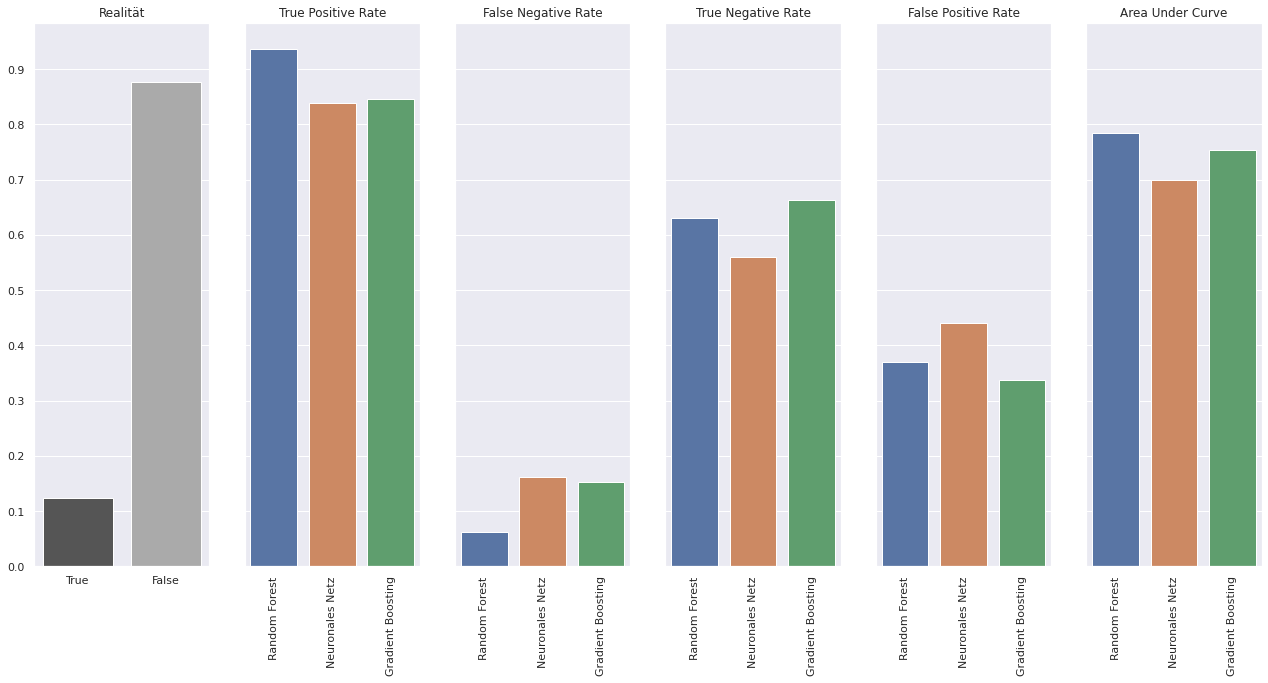

In [183]:
scores = pd.DataFrame(
    columns=["Name", "TN", "FP", "FN", "TP", "TPR", "FNR", "FPR", "AUC"])
for model in predictions:
    if model is not None:
        matrix, TPR, FNR, TNR, FPR = get_scores(y_test, model["Prediction"])
        AUC = metrics.roc_auc_score(y_test, model["Prediction"])
        scores = scores.append({"Name": model["Name"],
                                "TN": matrix[0][0], "FP": matrix[0][1],
                                "FN": matrix[1][0], "TP": matrix[1][1],
                                "TPR": TPR,
                                "FNR": FNR,
                                "TNR": TNR,
                                "FPR": FPR,
                                "AUC": AUC
                                }, ignore_index=True)
plot_scores(scores)


## 5.1 Model: Random Forest <a class="anchor" id="section5_1"></a>

Korrektklassifikationsrate: 0.67
Fehlerrate:                 0.33
Recall (TPR):               0.94
Precision:                  0.26
AUC                         0.78


Text(0.5, 1.0, 'Precision-Recall Curve')

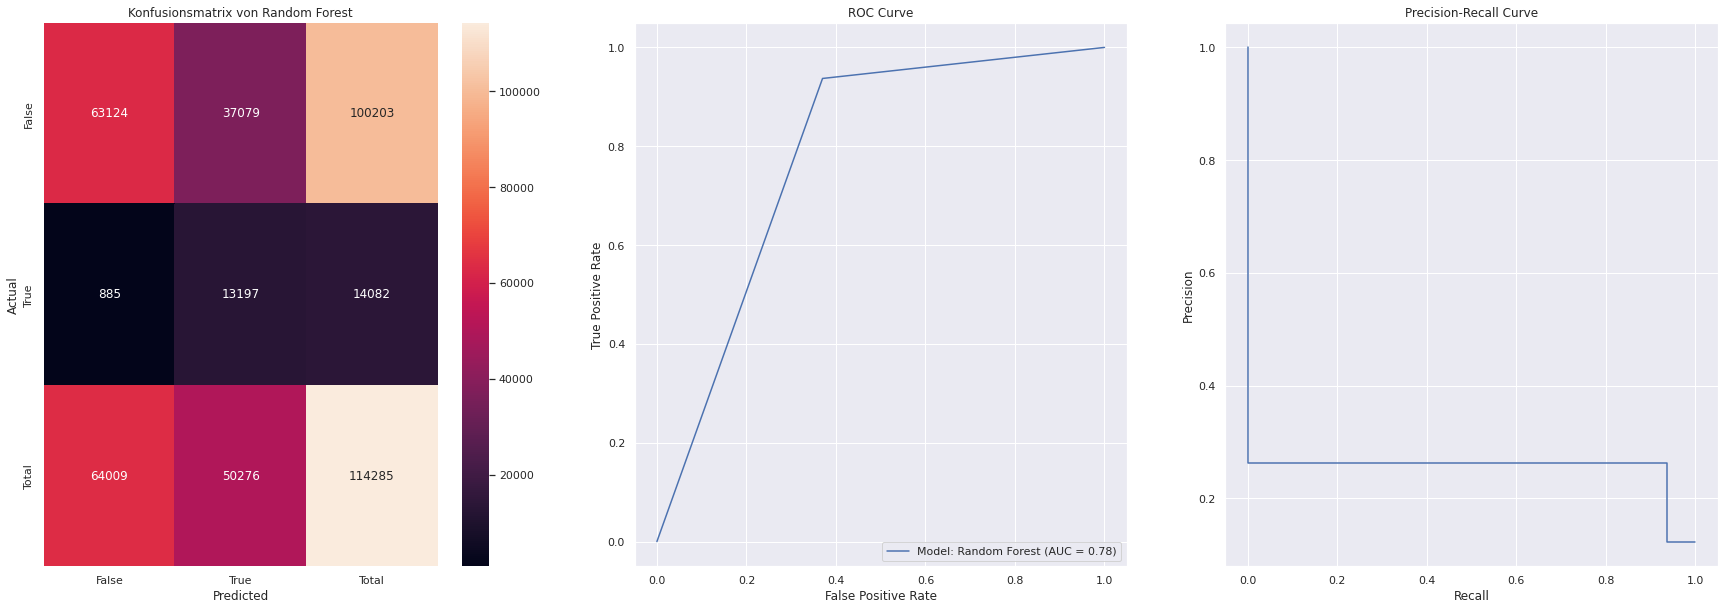

In [215]:
from sklearn.metrics import PrecisionRecallDisplay


def plot_confusion_matrix(y_test, y_prediction, model_name, axis=None):
    conf_matrix = get_confusion_matrix(y_test, y_prediction)

    plot = sns.heatmap(conf_matrix, annot=True, fmt="d", ax=axis)
    plot.set_xticklabels(["False", "True", "Total"])
    plot.set_yticklabels(["False", "True", "Total"])
    plot.set_xlabel("Predicted")
    plot.set_ylabel("Actual")
    plot.set_title(f"Konfusionsmatrix von {model_name}")
    # plot.axis = axis
    return plot


def plot_auc(y_test, y_prediction, model_name):
    fpr, tpr, t = metrics.roc_curve(y_test, y_prediction)
    roc_auc = metrics.auc(fpr, tpr)
    d = metrics.RocCurveDisplay(
        fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_name)
    return d


best_model = scores.loc[scores["Name"] == "Random Forest"].sum()
prediction = predictions[0]  # select Random Forest

n = best_model.TP + best_model.TN + best_model.FP + best_model.FN

ACC = (best_model.TP + best_model.TN) / n
ER = 1 - ACC
PRECISION = best_model.TP / (best_model.TP + best_model.FP)
print("Korrektklassifikationsrate: %.2f" % (ACC))
print("Fehlerrate:                 %.2f" % (ER))
print("Recall (TPR):               %.2f" % (best_model.TPR))
print("Precision:                  %.2f" % (PRECISION))
print("AUC                         %.2f" % (best_model.AUC))


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))

# confusion matrix
p_conf = plot_confusion_matrix(
    y_test, prediction["Prediction"], f"{prediction['Name']}", ax1)

# AUC
p_auc = plot_auc(y_test, prediction["Prediction"],
                 f"Model: {prediction['Name']}")
p_auc.plot(ax2)
ax2.set_title("ROC Curve")

p, r, t = metrics.precision_recall_curve(y_test, prediction["Prediction"])
prc = metrics.PrecisionRecallDisplay(p, r)
prc.plot(ax3);
ax3.set_title("Precision-Recall Curve")
